In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

c:\Users\I am Navin\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Profiling

In [2]:

events = pd.read_csv(r"ufc_event_data.csv")
fighters = pd.read_csv(r"ufc_fighters.csv")

In [3]:
df_events = pd.DataFrame(events)
df_fighters = pd.DataFrame(fighters)

### UFC Events Data

In [4]:
## Convert Event Date to DateTime
df_events['Event Date'] = pd.to_datetime(df_events['Event Date'])
df_events.head()

,Event Name,Event Date,Result,Fighter1,Fighter2,KD,Strikes,TD,Sub,Weight Class,Method,Round,Time
0,UFC Fight Night: Vera vs. Sandhagen,2023-03-25,Cory Sandhagen,Cory Sandhagen,Marlon Vera,0-0,128-58,3-0,0-1,Bantamweight,S-DEC,5,5:00
1,UFC Fight Night: Vera vs. Sandhagen,2023-03-25,Holly Holm,Holly Holm,Yana Santos,0-0,32-21,4-0,0-0,Women's Bantamweight,U-DEC,3,5:00
2,UFC Fight Night: Vera vs. Sandhagen,2023-03-25,Nate Landwehr,Nate Landwehr,Austin Lingo,0-0,64-48,1-0,1-0,Featherweight,SUB-Rear-Naked-Choke,2,4:11
3,UFC Fight Night: Vera vs. Sandhagen,2023-03-25,Maycee Barber,Maycee Barber,Andrea Lee,0-0,48-39,2-5,0-0,Women's Flyweight,S-DEC,3,5:00
4,UFC Fight Night: Vera vs. Sandhagen,2023-03-25,Albert Duraev,Albert Duraev,Chidi Njokuani,0-0,45-40,2-0,0-0,Middleweight,S-DEC,3,5:00


In [5]:
#Last 10 years
df_events = df_events[df_events['Event Date'].dt.year > 2012]
df_events['Time'] = pd.to_timedelta('00:' + df_events['Time']).dt.total_seconds().div(60).astype(float)
df_events

,Event Name,Event Date,Result,Fighter1,Fighter2,KD,Strikes,TD,Sub,Weight Class,Method,Round,Time
0,UFC Fight Night: Vera vs. Sandhagen,2023-03-25,Cory Sandhagen,Cory Sandhagen,Marlon Vera,0-0,128-58,3-0,0-1,Bantamweight,S-DEC,5,5.000000
1,UFC Fight Night: Vera vs. Sandhagen,2023-03-25,Holly Holm,Holly Holm,Yana Santos,0-0,32-21,4-0,0-0,Women's Bantamweight,U-DEC,3,5.000000
2,UFC Fight Night: Vera vs. Sandhagen,2023-03-25,Nate Landwehr,Nate Landwehr,Austin Lingo,0-0,64-48,1-0,1-0,Featherweight,SUB-Rear-Naked-Choke,2,4.183333
3,UFC Fight Night: Vera vs. Sandhagen,2023-03-25,Maycee Barber,Maycee Barber,Andrea Lee,0-0,48-39,2-5,0-0,Women's Flyweight,S-DEC,3,5.000000
4,UFC Fight Night: Vera vs. Sandhagen,2023-03-25,Albert Duraev,Albert Duraev,Chidi Njokuani,0-0,45-40,2-0,0-0,Middleweight,S-DEC,3,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4896,UFC on FX: Belfort vs Bisping,2013-01-19,Nik Lentz,Nik Lentz,Diego Nunes,0-0,56-18,10-0,0-0,Featherweight,U-DEC,3,5.000000
4897,UFC on FX: Belfort vs Bisping,2013-01-19,Edson Barboza,Edson Barboza,Lucas Martins,1-0,26-12,0-0,0-0,Lightweight,KO/TKO-Punches,1,2.633333
4898,UFC on FX: Belfort vs Bisping,2013-01-19,Unknown,Iuri Alcantara,Pedro Nobre,0-0,20-3,1-0,1-0,Bantamweight,CNC,1,2.183333
4899,UFC on FX: Belfort vs Bisping,2013-01-19,Ildemar Alcantara,Ildemar Alcantara,Wagner Prado,0-0,24-28,2-0,3-0,Light Heavyweight,SUB-Kneebar,2,2.650000


In [6]:
#Only looking at Lightweight Weight Class
df_events = df_events[df_events['Weight Class'] == 'Lightweight']
df_events

,Event Name,Event Date,Result,Fighter1,Fighter2,KD,Strikes,TD,Sub,Weight Class,Method,Round,Time
11,UFC 286: Edwards vs. Usman 3,2023-03-18,Justin Gaethje,Justin Gaethje,Rafael Fiziev,0-0,103-97,1-0,0-0,Lightweight,M-DEC,3,5.000000
16,UFC 286: Edwards vs. Usman 3,2023-03-18,Chris Duncan,Chris Duncan,Omar Morales,0-0,53-47,5-0,0-0,Lightweight,S-DEC,3,5.000000
17,UFC 286: Edwards vs. Usman 3,2023-03-18,Yanal Ashmouz,Yanal Ashmouz,Sam Patterson,0-0,15-2,1-0,0-0,Lightweight,KO/TKO-Punches,1,1.250000
23,UFC 286: Edwards vs. Usman 3,2023-03-18,Draw,Jai Herbert,Ludovit Klein,0-0,43-47,1-2,0-0,Lightweight,M-DEC,3,5.000000
41,UFC 285: Jones vs. Gane,2023-03-04,Mateusz Gamrot,Mateusz Gamrot,Jalin Turner,0-1,29-40,4-0,0-0,Lightweight,S-DEC,3,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4881,UFC on FOX: Johnson vs Dodson,2013-01-26,Anthony Pettis,Anthony Pettis,Donald Cerrone,1-0,18-4,0-0,0-0,Lightweight,KO/TKO-Kick,1,2.583333
4883,UFC on FOX: Johnson vs Dodson,2013-01-26,TJ Grant,TJ Grant,Matt Wiman,1-0,54-18,0-0,0-0,Lightweight,KO/TKO-Elbows,1,4.850000
4893,UFC on FX: Belfort vs Bisping,2013-01-19,Khabib Nurmagomedov,Khabib Nurmagomedov,Thiago Tavares,1-0,22-2,0-0,0-0,Lightweight,KO/TKO-Elbows,1,1.916667
4897,UFC on FX: Belfort vs Bisping,2013-01-19,Edson Barboza,Edson Barboza,Lucas Martins,1-0,26-12,0-0,0-0,Lightweight,KO/TKO-Punches,1,2.633333


In [7]:
df_events = df_events.drop(columns=['Event Name','Event Date'])

In [8]:
#Remove Draws
df_events = df_events[df_events['Result'] != 'Draw']

In [9]:
#Remove Dissqualifications and Combine Methods into either KO, Submission = 1 or other (M-Dec, U-Dec)
df_events['Method'].unique()

array(['M-DEC', 'S-DEC', 'KO/TKO-Punches', 'U-DEC', 'KO/TKO-Punch',
       'KO/TKO-Knees', 'SUB-Rear-Naked-Choke', 'KO/TKO', 'KO/TKO-Elbows',
       'KO/TKO-Flying-Knee', 'KO/TKO-Kick', 'SUB-Arm-Triangle',
       'SUB-Guillotine-Choke', 'SUB-Kneebar', 'KO/TKO-Knee',
       'SUB-Inverted-Triangle', 'SUB-Kimura', 'CNC', "SUB-D'Arce-Choke",
       'KO/TKO-Slam', 'SUB-Triangle-Choke', 'SUB-Armbar',
       'Overturned-Guillotine-Choke', 'KO/TKO-Spinning-Back-Fist',
       'SUB-Ankle-Lock', 'DQ', 'SUB-Schultz-Front-Headlock',
       'KO/TKO-Spinning-Back-Kick', 'SUB-Anaconda-Choke', 'SUB-Heel-Hook',
       'SUB-Neck-Crank', 'KO/TKO-Kicks', 'SUB-North-South-Choke',
       'SUB-Von-Flue-Choke', 'KO/TKO-Elbow', 'DQ-Rear-Naked-Choke',
       'SUB-Bulldog-Choke', 'SUB-Straight-Armbar', 'Overturned'],
      dtype=object)

In [10]:
#Remove DQ, Overturned, CNC, Overturned-Guillotine-Choke
df_events = df_events[~df_events['Method'].str.contains('DQ')]
df_events = df_events[~df_events['Method'].str.contains('Overturned')]
df_events = df_events[~df_events['Method'].str.contains('CNC')]
df_events = df_events[~df_events['Method'].str.contains('Overturned-Guillotine-Choke')]

In [11]:
#Boolean Masking to replace any string with the letters KO in it with KO
mask = df_events['Method'].str.contains('KO')
df_events.loc[mask, 'Method'] = 'KO'

In [12]:
#Boolean Masking to replace any string with the letters SUB in it with SUB
mask = df_events['Method'].str.contains('SUB')
df_events.loc[mask, 'Method'] = 'SUB'

In [13]:
df_events.columns

Index(['Result', 'Fighter1', 'Fighter2', 'KD', 'Strikes', 'TD', 'Sub',
       'Weight Class', 'Method', 'Round', 'Time'],
      dtype='object')

### UFC Fighter Data

In [14]:
df_fighters #.head()

,First Name,Last Name,Nickname,Height,Weight,Reach,Stance,Wins,Losses,Draws
0,Tom,Aaron,NaN,--,155 lbs.,--,NaN,5,3,0
1,Danny,Abbadi,The Assassin,"5' 11""",155 lbs.,--,Orthodox,4,6,0
2,Nariman,Abbasov,Bayraktar,"5' 8""",155 lbs.,"66.0""",Orthodox,28,4,0
3,David,Abbott,Tank,"6' 0""",265 lbs.,--,Switch,10,15,0
4,Hamdy,Abdelwahab,The Hammer,"6' 2""",264 lbs.,"72.0""",Southpaw,5,0,0
...,...,...,...,...,...,...,...,...,...,...
3946,Dave,Zitanick,NaN,--,170 lbs.,--,NaN,5,7,0
3947,Alex,Zuniga,NaN,--,145 lbs.,--,NaN,6,3,0
3948,George,Zuniga,NaN,"5' 9""",185 lbs.,--,NaN,3,1,0
3949,Allan,Zuniga,Tigre,"5' 7""",155 lbs.,"70.0""",Orthodox,13,1,0


In [15]:
df_fighters['Name'] = df_fighters['First Name'] + ' ' + df_fighters['Last Name']
df_fighters.drop(columns= ['First Name','Last Name','Nickname'], inplace = True)

In [16]:
#Remove the 170 lbs people as they are welterweight by definition
df_fighters = df_fighters[df_fighters['Weight'] != '170 lbs.']
#Drop the -- rows
df_fighters = df_fighters[df_fighters['Weight'] != '--']
df_fighters = df_fighters[df_fighters['Reach'] != '--']
df_fighters = df_fighters[df_fighters['Height'] != '--']

In [17]:
df_fighters['Weight'] = df_fighters['Weight'].str.replace('lbs.', '').astype(float)

C:\Users\I am Navin\AppData\Local\Temp\ipykernel_11984\3293533225.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_fighters['Weight'] = df_fighters['Weight'].str.replace('lbs.', '').astype(float)


In [18]:
df_fighters['Height'] = df_fighters['Height'].apply(lambda x: (int(x.split("'")[0]) * 12 + int(x.split("'")[1].strip('"'))) * 2.54)
df_fighters['Reach'] = df_fighters['Reach'].apply(lambda x: (float(x.strip('"'))) * 2.54)

In [19]:
#Drop null name values
df_fighters.isnull().sum()

Height     0
Weight     0
Reach      0
Stance    19
Wins       0
Losses     0
Draws      0
Name       7
dtype: int64

In [20]:
df_fighters = df_fighters[df_fighters['Name'].notnull()]

## Exploratory Data Analysis

In [21]:
df_fighters.describe()

,Height,Weight,Reach,Wins,Losses,Draws
count,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000
mean,176.932317,161.626478,181.143132,14.347518,5.521277,0.181442
std,9.468931,37.070808,11.190342,7.632901,3.908189,0.524558
min,152.400000,115.000000,147.320000,1.000000,0.000000,0.000000
25%,170.180000,135.000000,172.720000,9.000000,3.000000,0.000000
50%,175.260000,155.000000,180.340000,13.000000,5.000000,0.000000
75%,182.880000,185.000000,187.960000,18.000000,7.000000,0.000000
max,210.820000,265.000000,213.360000,91.000000,26.000000,7.000000


In [22]:
df_fighters.shape

(1692, 8)

In [23]:
df_events.describe()

,Round,Time
count,771.000000,771.000000
mean,2.381323,3.799805
std,0.925744,1.524691
min,1.000000,0.116667
25%,2.000000,2.508333
50%,3.000000,5.000000
75%,3.000000,5.000000
max,5.000000,5.000000


In [24]:
df_events.shape

(771, 11)

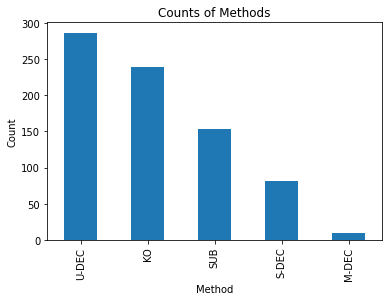

In [25]:

method_counts = df_events['Method'].value_counts()
method_counts.plot.bar()
plt.title('Counts of Methods')
plt.xlabel('Method')
plt.ylabel('Count')
plt.show()


- Will be interesting to try predict whetehr a fight would be KO/Sub or By Decision

In [26]:
df_events

,Result,Fighter1,Fighter2,KD,Strikes,TD,Sub,Weight Class,Method,Round,Time
11,Justin Gaethje,Justin Gaethje,Rafael Fiziev,0-0,103-97,1-0,0-0,Lightweight,M-DEC,3,5.000000
16,Chris Duncan,Chris Duncan,Omar Morales,0-0,53-47,5-0,0-0,Lightweight,S-DEC,3,5.000000
17,Yanal Ashmouz,Yanal Ashmouz,Sam Patterson,0-0,15-2,1-0,0-0,Lightweight,KO,1,1.250000
41,Mateusz Gamrot,Mateusz Gamrot,Jalin Turner,0-1,29-40,4-0,0-0,Lightweight,S-DEC,3,5.000000
51,Loik Radzhabov,Loik Radzhabov,Esteban Ribovics,0-1,40-66,11-0,0-1,Lightweight,U-DEC,3,5.000000
...,...,...,...,...,...,...,...,...,...,...,...
4881,Anthony Pettis,Anthony Pettis,Donald Cerrone,1-0,18-4,0-0,0-0,Lightweight,KO,1,2.583333
4883,TJ Grant,TJ Grant,Matt Wiman,1-0,54-18,0-0,0-0,Lightweight,KO,1,4.850000
4893,Khabib Nurmagomedov,Khabib Nurmagomedov,Thiago Tavares,1-0,22-2,0-0,0-0,Lightweight,KO,1,1.916667
4897,Edson Barboza,Edson Barboza,Lucas Martins,1-0,26-12,0-0,0-0,Lightweight,KO,1,2.633333


In [27]:
# df_events['Method'] = df_events['Method'].apply(lambda x: 1 if x in ['KO', 'SUB'] else 0).values

In [28]:
# df_events.corr()

In [29]:
df_fighters

,Height,Weight,Reach,Stance,Wins,Losses,Draws,Name
2,172.72,155.0,167.64,Orthodox,28,4,0,Nariman Abbasov
4,187.96,264.0,182.88,Southpaw,5,0,0,Hamdy Abdelwahab
5,190.50,235.0,193.04,Orthodox,20,8,0,Shamil Abdurakhimov
10,182.88,205.0,187.96,Orthodox,15,4,0,Klidson Abreu
14,195.58,265.0,203.20,Orthodox,5,3,0,Juan Adams
...,...,...,...,...,...,...,...,...
3939,162.56,125.0,167.64,Switch,14,8,0,Zhalgas Zhumagulov
3940,185.42,155.0,190.50,Orthodox,13,4,0,Fares Ziam
3944,167.64,145.0,172.72,Southpaw,10,4,0,Cat Zingano
3949,170.18,155.0,177.80,Orthodox,13,1,0,Allan Zuniga


In [30]:
#Top players of KO's 
#Total KO difference in all games

top_ko = []

for fighter in df_fighters['Name']:
    print(fighter)
    ko_1 = len(df_events[((df_events['Fighter1'] == fighter) | (df_events['Fighter2'] == fighter)) & (df_events['Method'] == 'KO')])
    top_ko.append((ko_1, fighter))
    print(ko_1)
    

Nariman Abbasov
0
Hamdy Abdelwahab
0
Shamil Abdurakhimov
0
Klidson Abreu
0
Juan Adams
0
Anthony Adams
0
Zarrukh Adashev
0
Israel Adesanya
0
Mariya Agapova
0
Jessica Aguilar
0
Kevin Aguilar
0
Jesus Aguilar
0
Nick Aguirre
0
Ashiek Ajim
0
Omari Akhmedov
0
Mostapha Al-Turk
0
Herdem Alacabek
0
Amir Albazi
0
John Albert
0
Junior Albini
0
Aleksandra Albu
0
Iuri Alcantara
0
Ildemar Alcantara
0
Irene Aldana
0
Jose Alday
0
Jose Aldo
0
JJ Aldrich
0
Jim Alers
0
John Alessio
0
Houston Alexander
0
Lucas Alexander
0
Marcio Alexandre Junior
0
Bill Algeo
0
Nurullo Aliev
0
Ikram Aliskerov
0
Leon Aliu
0
John Allan
0
Arnold Allen
0
Brendan Allen
0
Thomas Almeida
0
Jailton Almeida
0
Lucas Almeida
0
Sarah Alpar
0
Ali AlQaisi
0
Victor Altamirano
0
Eddie Alvarez
4
Jaime Alvarez
0
Joel Alvarez
3
Rafael Alves
1
Sam Alvey
0
Rayanne Amanda
0
Alen Amedovski
0
Makwan Amirkhani
0
Eryk Anders
0
Corey Anderson
0
Megan Anderson
0
Jessica Andrade
0
Juan Andres Luna
0
Dylan Andrews
0
Collin Anglin
0
Chad Anheliger
0
Mago

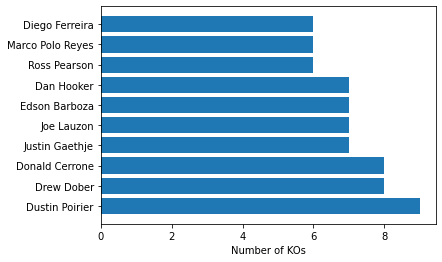

In [31]:
top_ko = sorted(top_ko, reverse=True)

# Get the top 10 players
top_10 = top_ko[:10]

ko_count = [t[0] for t in top_10]
players = [t[1] for t in top_10]

plt.barh(players, ko_count)
plt.xlabel('Number of KOs')
plt.show()

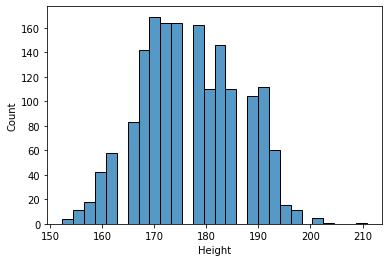

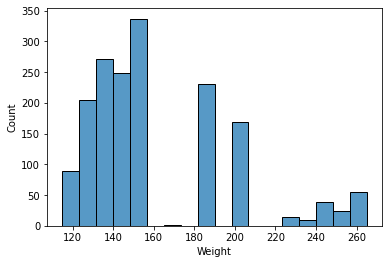

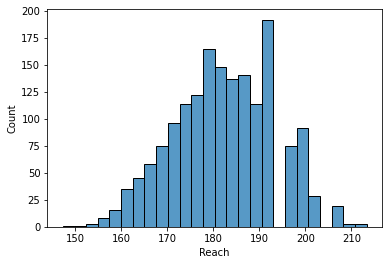

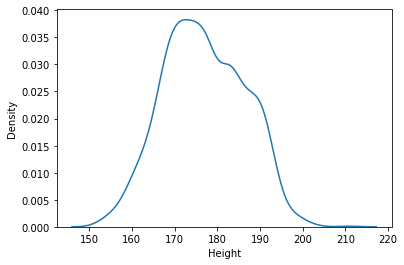

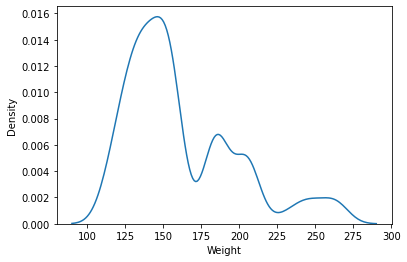

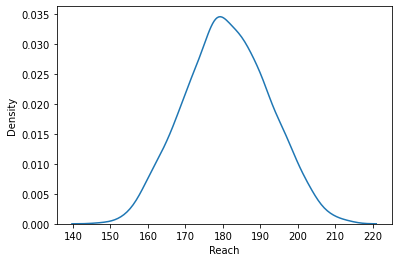

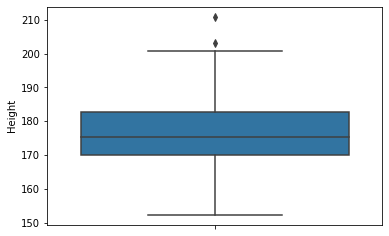

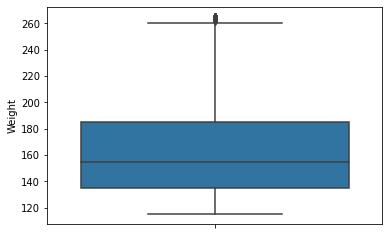

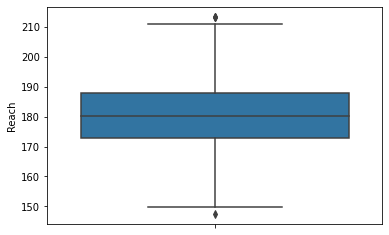

In [32]:
# Plot histograms for fighters in all weight categories
sns.histplot(df_fighters['Height'])
plt.show()

sns.histplot(df_fighters['Weight'])
plt.show()

sns.histplot(df_fighters['Reach'])
plt.show()

# Plot density plots for numerical columns
sns.kdeplot(df_fighters['Height'])
plt.show()

sns.kdeplot(df_fighters['Weight'])
plt.show()

sns.kdeplot(df_fighters['Reach'])
plt.show()

# Plot box plots for numerical columns
sns.boxplot(y=df_fighters['Height'])
plt.show()

sns.boxplot(y=df_fighters['Weight'])
plt.show()

sns.boxplot(y=df_fighters['Reach'])
plt.show()

In [33]:
#Top players of KD's 

top_kd = []

for fighter in df_fighters['Name']:
    print(fighter)
    ko_1 = len(df_events[((df_events['Fighter1'] == fighter) | (df_events['Fighter2'] == fighter)) & (df_events['Method'] == 'KO')])
    top_ko.append((ko_1, fighter))
    print(ko_1)

Nariman Abbasov
0
Hamdy Abdelwahab
0
Shamil Abdurakhimov
0
Klidson Abreu
0
Juan Adams
0
Anthony Adams
0
Zarrukh Adashev
0
Israel Adesanya
0
Mariya Agapova
0
Jessica Aguilar
0
Kevin Aguilar
0
Jesus Aguilar
0
Nick Aguirre
0
Ashiek Ajim
0
Omari Akhmedov
0
Mostapha Al-Turk
0
Herdem Alacabek
0
Amir Albazi
0
John Albert
0
Junior Albini
0
Aleksandra Albu
0
Iuri Alcantara
0
Ildemar Alcantara
0
Irene Aldana
0
Jose Alday
0
Jose Aldo
0
JJ Aldrich
0
Jim Alers
0
John Alessio
0
Houston Alexander
0
Lucas Alexander
0
Marcio Alexandre Junior
0
Bill Algeo
0
Nurullo Aliev
0
Ikram Aliskerov
0
Leon Aliu
0
John Allan
0
Arnold Allen
0
Brendan Allen
0
Thomas Almeida
0
Jailton Almeida
0
Lucas Almeida
0
Sarah Alpar
0
Ali AlQaisi
0
Victor Altamirano
0
Eddie Alvarez
4
Jaime Alvarez
0
Joel Alvarez
3
Rafael Alves
1
Sam Alvey
0
Rayanne Amanda
0
Alen Amedovski
0
Makwan Amirkhani
0
Eryk Anders
0
Corey Anderson
0
Megan Anderson
0
Jessica Andrade
0
Juan Andres Luna
0
Dylan Andrews
0
Collin Anglin
0
Chad Anheliger
0
Mago

In [34]:
df_events

,Result,Fighter1,Fighter2,KD,Strikes,TD,Sub,Weight Class,Method,Round,Time
11,Justin Gaethje,Justin Gaethje,Rafael Fiziev,0-0,103-97,1-0,0-0,Lightweight,M-DEC,3,5.000000
16,Chris Duncan,Chris Duncan,Omar Morales,0-0,53-47,5-0,0-0,Lightweight,S-DEC,3,5.000000
17,Yanal Ashmouz,Yanal Ashmouz,Sam Patterson,0-0,15-2,1-0,0-0,Lightweight,KO,1,1.250000
41,Mateusz Gamrot,Mateusz Gamrot,Jalin Turner,0-1,29-40,4-0,0-0,Lightweight,S-DEC,3,5.000000
51,Loik Radzhabov,Loik Radzhabov,Esteban Ribovics,0-1,40-66,11-0,0-1,Lightweight,U-DEC,3,5.000000
...,...,...,...,...,...,...,...,...,...,...,...
4881,Anthony Pettis,Anthony Pettis,Donald Cerrone,1-0,18-4,0-0,0-0,Lightweight,KO,1,2.583333
4883,TJ Grant,TJ Grant,Matt Wiman,1-0,54-18,0-0,0-0,Lightweight,KO,1,4.850000
4893,Khabib Nurmagomedov,Khabib Nurmagomedov,Thiago Tavares,1-0,22-2,0-0,0-0,Lightweight,KO,1,1.916667
4897,Edson Barboza,Edson Barboza,Lucas Martins,1-0,26-12,0-0,0-0,Lightweight,KO,1,2.633333


In [35]:
#Make new List of all the fighters looked at in this project
all_fighters = pd.unique(df_events[['Fighter1', 'Fighter2']].values.ravel())

In [36]:
#Get the additional features for the winners list

ttl_strikes_lst = []
ttl_td_lst = []
ttl_sub_lst = []


for fighter in all_fighters:
    print(fighter)
    df_impr = (df_events[(df_events['Fighter1'] == fighter) | (df_events['Fighter2'] == fighter)])
   
    ttl_strikes = 0 #Initialise ttl strikes by each fighter each time
    ttl_tds = 0
    ttl_subs = 0

    #Loop through new dataframe and get the data
    for i in range(len(df_impr)):
    
    #Check if Fighter is Fighter1 or Fighter2
        
        if fighter == df_impr.iloc[i]['Fighter1']:
            
            #Strikes
            strikes = df_impr.iloc[i]['Strikes']
            strikes = strikes.split('-')
            strikes = strikes[0]

            #Takedowns
            tds = df_impr.iloc[i]['TD']
            tds = tds.split('-')
            tds = tds[0]      

            #Submissions
            subs = df_impr.iloc[i]['Sub']
            subs = subs.split('-')
            subs = subs[0]      

        else: #Fighter is Fighter2
            
            #Strikes
            strikes = df_impr.iloc[i]['Strikes']
            strikes = strikes.split('-')
            strikes = strikes[1]

            #Takedowns
            tds = df_impr.iloc[i]['TD']
            tds = tds.split('-')
            tds = tds[1]
            
            #Submissions
            subs = df_impr.iloc[i]['Sub']
            subs = subs.split('-')
            subs = subs[1]   
        
        ttl_strikes = ttl_strikes + int(strikes)
        ttl_tds = ttl_tds + int(tds)
        ttl_subs = ttl_subs + int(subs)

    ttl_strikes_lst.append(ttl_strikes)
    ttl_td_lst.append(ttl_tds)
    ttl_sub_lst.append(ttl_subs) 


Justin Gaethje
Rafael Fiziev
Chris Duncan
Omar Morales
Yanal Ashmouz
Sam Patterson
Mateusz Gamrot
Jalin Turner
Loik Radzhabov
Esteban Ribovics
Trevor Peek
Erick Gonzalez
Jordan Leavitt
Victor Martinez
Joe Solecki
Carl Deaton
Nurullo Aliev
Rafael Alves
Alexander Hernandez
Jim Miller
Nazim Sadykhov
Evan Elder
Islam Makhachev
Alexander Volkanovski
Jamie Mullarkey
Francisco Prado
Elves Brener
Zubaira Tukhugov
Anshul Jubli
Jeka Saragih
Thiago Moises
Melquizael Costa
Ismael Bonfim
Terrance McKinney
Mateusz Rebecki
Nick Fiore
Arman Tsarukyan
Damir Ismagulov
Drew Dober
Bobby Green
Rafa Garcia
Maheshate
Paddy Pimblett
Jared Gordon
Clay Guida
Scott Holtzman
Michael Johnson
Marc Diakiese
Natan Levy
Genaro Valdez
Dustin Poirier
Michael Chandler
Dan Hooker
Claudio Puelles
Renato Moicano
Brad Riddell
Matt Frevola
Ottman Azaitar
Grant Dawson
Mark Madsen
Charles Oliveira
Beneil Dariush
Mike Davis
Viacheslav Borshchev
Joaquim Silva
Jesse Ronson
Trey Ogden
Daniel Zellhuber
Nikolas Motta
Cameron VanCamp


In [37]:
df_eda = pd.DataFrame({'fighter':all_fighters,'ttl_strikes':ttl_strikes_lst,'ttl_takedowns':ttl_td_lst,'ttl_submissions':ttl_sub_lst})
df_eda.sort_values(by='ttl_strikes')

,fighter,ttl_strikes,ttl_takedowns,ttl_submissions
290,Jorge de Oliveira,0,0,0
125,Aalon Cruz,0,0,0
117,Jeremy Stephens,0,0,0
15,Carl Deaton,1,0,0
260,Artem Lobov,2,0,0
...,...,...,...,...
46,Michael Johnson,897,7,1
71,John Makdessi,963,0,0
95,Tony Ferguson,968,3,15
50,Dustin Poirier,1066,17,10


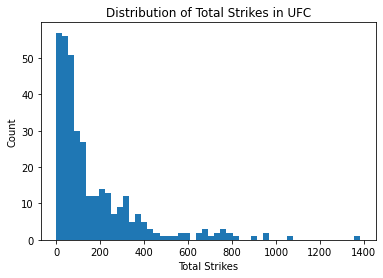

In [38]:
plt.hist(df_eda['ttl_strikes'], bins=50)
plt.title('Distribution of Total Strikes in UFC')
plt.xlabel('Total Strikes')
plt.ylabel('Count')
plt.show()

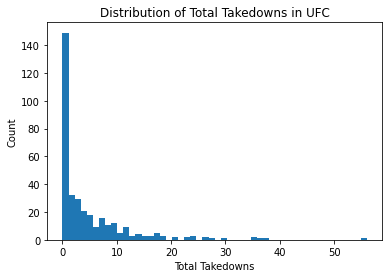

In [39]:
plt.hist(df_eda['ttl_takedowns'], bins=50)
plt.title('Distribution of Total Takedowns in UFC')
plt.xlabel('Total Takedowns')
plt.ylabel('Count')
plt.show()

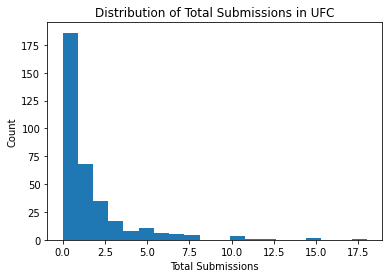

In [40]:
plt.hist(df_eda['ttl_submissions'], bins=20)
plt.title('Distribution of Total Submissions in UFC')
plt.xlabel('Total Submissions')
plt.ylabel('Count')
plt.show()

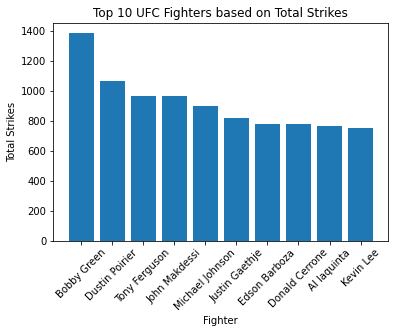

In [41]:
# Get the top 10 fighters based on total strikes
top_strikers = df_eda.nlargest(10, 'ttl_strikes')

# Plot the top 10 strikers based on total strikes
plt.bar(top_strikers['fighter'], top_strikers['ttl_strikes'])
plt.title('Top 10 UFC Fighters based on Total Strikes')
plt.xlabel('Fighter')
plt.ylabel('Total Strikes')
plt.xticks(rotation=45)
plt.show()

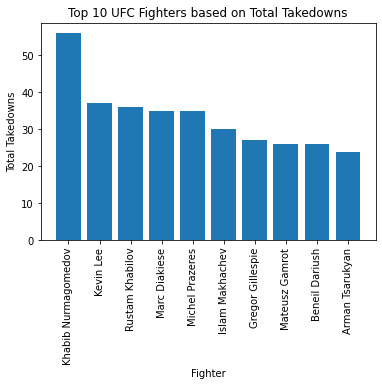

In [42]:
# Get the top 10 fighters based on total takedwons
top_tds = df_eda.nlargest(10, 'ttl_takedowns')

# Plot the top 10 strikers based on total strikes
plt.bar(top_tds['fighter'], top_tds['ttl_takedowns'])
plt.title('Top 10 UFC Fighters based on Total Takedowns')
plt.xlabel('Fighter')
plt.ylabel('Total Takedowns')
plt.xticks(rotation=90)
plt.show()

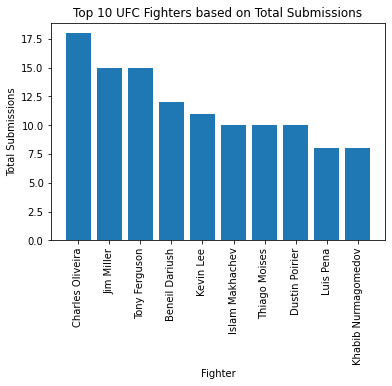

In [43]:
# Get the top 10 fighters based on total takedwons
top_subs = df_eda.nlargest(10, 'ttl_submissions')

# Plot the top 10 strikers based on total strikes
plt.bar(top_subs['fighter'], top_subs['ttl_submissions'])
plt.title('Top 10 UFC Fighters based on Total Submissions')
plt.xlabel('Fighter')
plt.ylabel('Total Submissions')
plt.xticks(rotation=90)
plt.show()

## Set Up for Modelling

Want to predict whether a fight will be KO/Submission or not.

- Target Variable = Whether a fight was a KO/Sub or not
- Input Variables = The Difference if Fighters Attributes (e.g. Was the winner taller, shorter, more experienced etc.)

In [44]:
winner_height_diff = []
winner_weight_diff = []
winner_reach_diff = []
winner_wins_diff = []
experience_diff_lst = []
winner_lst = []
loser_lst = []
method_lst = []

for row in range(len(df_events)):
    fight = df_events.iloc[row]
    
    #Initalise Fighters names
    name_1 = fight['Result'] #Winner
    
    print(name_1)
    name_2 = fight['Fighter2'] #Loser
    
    print(name_2)
    
    try:
      
        #Calculate Height Difference
        height_diff = float((df_fighters[df_fighters['Name'] == name_1])['Height']) - float((df_fighters[df_fighters['Name'] == name_2])['Height'])
        print(((df_fighters[df_fighters['Name'] == name_1])['Height']))
        print(((df_fighters[df_fighters['Name'] == name_2])['Height']))
        print("Height Difference: ", height_diff)
        winner_height_diff.append(height_diff)

        #Caluclate Weight Difference
        weight_diff = float((df_fighters[df_fighters['Name'] == name_1])['Weight']) - float((df_fighters[df_fighters['Name'] == name_2])['Weight'])
        print(((df_fighters[df_fighters['Name'] == name_1])['Weight']))
        print(((df_fighters[df_fighters['Name'] == name_2])['Weight']))
        print("Weight Difference: ", weight_diff)
        winner_weight_diff.append(weight_diff)

        #Caluclate Reach Difference
        reach_diff = float((df_fighters[df_fighters['Name'] == name_1])['Reach']) - float((df_fighters[df_fighters['Name'] == name_2])['Reach'])
        print(((df_fighters[df_fighters['Name'] == name_1])['Reach']))
        print(((df_fighters[df_fighters['Name'] == name_2])['Reach']))
        print("Reach Difference: ", reach_diff)
        winner_reach_diff.append(reach_diff)

        #Calculate Total Wins difference
        wins_diff = int((df_fighters[df_fighters['Name'] == name_1])['Wins']) - int((df_fighters[df_fighters['Name'] == name_2])['Wins'])
        print(((df_fighters[df_fighters['Name'] == name_1])['Wins']))
        print(((df_fighters[df_fighters['Name'] == name_2])['Wins']))
        print("Wins Difference: ", wins_diff)
        winner_wins_diff.append(wins_diff)

        #Total Games Difference (Experience)
        df_fight_1 = (df_fighters[df_fighters['Name'] == name_1])
        df_fight_2 = (df_fighters[df_fighters['Name'] == name_2])

        expereince_diff = int((df_fight_1['Wins']) + (df_fight_1['Losses']) + (df_fight_1['Draws'])) - int((df_fight_2['Wins']) + (df_fight_2['Losses']) + (df_fight_2['Draws']))

        print(int((df_fight_1['Wins']) + (df_fight_1['Losses']) + (df_fight_1['Draws'])))
        print(int((df_fight_2['Wins']) + (df_fight_2['Losses']) + (df_fight_2['Draws'])))
        print("Experience Difference: ", expereince_diff)
        experience_diff_lst.append(expereince_diff)

        #Method of win
        method_lst.append(fight['Method'])

        winner_lst.append(name_1)
        loser_lst.append(name_2)
    
    except TypeError:
        print('Fighter doesnt have data.... Skipping...')
        continue

Justin Gaethje
Rafael Fiziev
1159    180.34
Name: Height, dtype: float64
1087    172.72
Name: Height, dtype: float64
Height Difference:  7.6200000000000045
1159    155.0
Name: Weight, dtype: float64
1087    155.0
Name: Weight, dtype: float64
Weight Difference:  0.0
1159    177.8
Name: Reach, dtype: float64
1087    180.34
Name: Reach, dtype: float64
Reach Difference:  -2.539999999999992
1159    24
Name: Wins, dtype: int64
1087    12
Name: Wins, dtype: int64
Wins Difference:  12
28
14
Experience Difference:  14
Chris Duncan
Omar Morales
923    177.8
Name: Height, dtype: float64
2405    180.34
Name: Height, dtype: float64
Height Difference:  -2.539999999999992
923    155.0
Name: Weight, dtype: float64
2405    155.0
Name: Weight, dtype: float64
Weight Difference:  0.0
923    180.34
Name: Reach, dtype: float64
2405    185.42
Name: Reach, dtype: float64
Reach Difference:  -5.0800000000000125
923    10
Name: Wins, dtype: int64
2405    11
Name: Wins, dtype: int64
Wins Difference:  -1
11
15
Exp

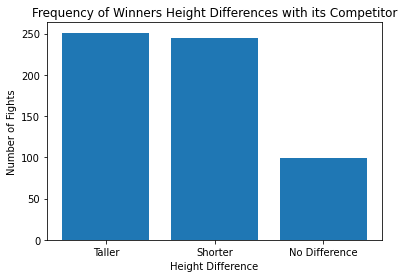

In [45]:
# calculate the counts of each category
height_diff_arr = np.array(winner_height_diff)
pos_count = np.sum(height_diff_arr > 0)
neg_count = np.sum(height_diff_arr < 0)
zero_count = np.sum(height_diff_arr == 0)

# plot the bar chart
plt.bar(['Taller', 'Shorter', 'No Difference'], [pos_count, neg_count, zero_count])
plt.title('Frequency of Winners Height Differences with its Competitor')
plt.xlabel('Height Difference')
plt.ylabel('Number of Fights')
plt.show()

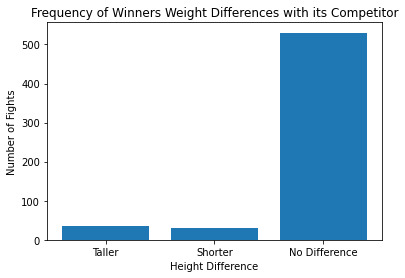

In [46]:
# calculate the counts of each category
weight_diff_arr = np.array(winner_weight_diff)
pos_count = np.sum(weight_diff_arr > 0)
neg_count = np.sum(weight_diff_arr < 0)
zero_count = np.sum(weight_diff_arr == 0)

# plot the bar chart
plt.bar(['Taller', 'Shorter', 'No Difference'], [pos_count, neg_count, zero_count])
plt.title('Frequency of Winners Weight Differences with its Competitor')
plt.xlabel('Height Difference')
plt.ylabel('Number of Fights')
plt.show()

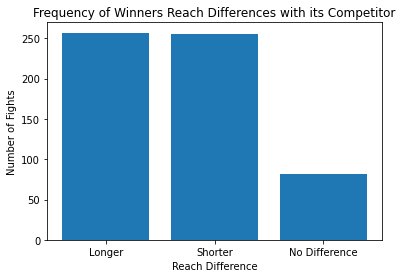

In [47]:
# calculate the counts of each category
reach_diff_arr = np.array(winner_reach_diff)
pos_count = np.sum(reach_diff_arr > 0)
neg_count = np.sum(reach_diff_arr < 0)
zero_count = np.sum(reach_diff_arr == 0)

# plot the bar chart
plt.bar(['Longer', 'Shorter', 'No Difference'], [pos_count, neg_count, zero_count])
plt.title('Frequency of Winners Reach Differences with its Competitor')
plt.xlabel('Reach Difference')
plt.ylabel('Number of Fights')
plt.show()

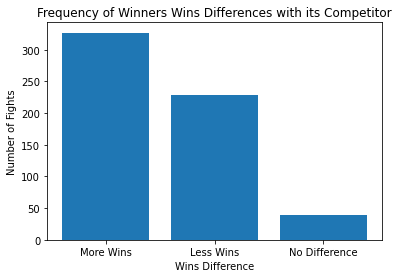

In [48]:

# calculate the counts of each category
wins_diff_arr = np.array(winner_wins_diff)
pos_count = np.sum(wins_diff_arr > 0)
neg_count = np.sum(wins_diff_arr < 0)
zero_count = np.sum(wins_diff_arr == 0)

# plot the bar chart
plt.bar(['More Wins', 'Less Wins', 'No Difference'], [pos_count, neg_count, zero_count])
plt.title('Frequency of Winners Wins Differences with its Competitor')
plt.xlabel('Wins Difference')
plt.ylabel('Number of Fights')
plt.show()

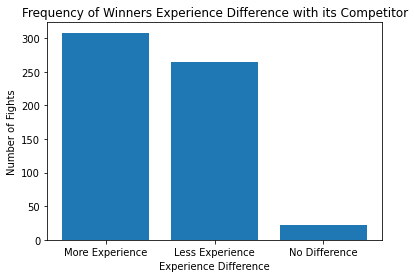

In [49]:
# calculate the counts of each category
experience_diff_arr = np.array(experience_diff_lst)
pos_count = np.sum(experience_diff_arr > 0)
neg_count = np.sum(experience_diff_arr < 0)
zero_count = np.sum(experience_diff_arr == 0)

# plot the bar chart
plt.bar(['More Experience', 'Less Experience', 'No Difference'], [pos_count, neg_count, zero_count])
plt.title('Frequency of Winners Experience Difference with its Competitor')
plt.xlabel('Experience Difference')
plt.ylabel('Number of Fights')
plt.show()

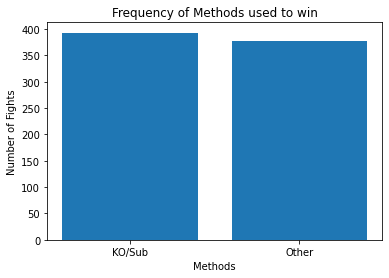

In [50]:
#Number of KO's/Sub vs Other Methods of Winning
count_method = df_events['Method'].apply(lambda x: 1 if x in ['KO', 'SUB'] else 0).values
pos_count = np.sum(count_method == 1)
zero_count = np.sum(count_method == 0)

# plot the bar chart
plt.bar(['KO/Sub', 'Other'], [pos_count, zero_count])
plt.title('Frequency of Methods used to win')
plt.xlabel('Methods')
plt.ylabel('Number of Fights')
plt.show()

In [51]:

zeros = np.count_nonzero(count_method == 0)
ones = np.count_nonzero(count_method == 1)
print("Number of 0's:", zeros)
print("Number of 1's:", ones)

Number of 0's: 378
Number of 1's: 393


Input Variables

In [52]:
len(height_diff_arr)

594

In [53]:
# 'Winner':winner_lst,'Loser':loser_lst,
len(winner_lst)

594

In [54]:
method_lst

['M-DEC',
 'S-DEC',
 'KO',
 'S-DEC',
 'U-DEC',
 'KO',
 'KO',
 'SUB',
 'M-DEC',
 'U-DEC',
 'KO',
 'U-DEC',
 'U-DEC',
 'S-DEC',
 'KO',
 'SUB',
 'KO',
 'U-DEC',
 'U-DEC',
 'KO',
 'U-DEC',
 'S-DEC',
 'U-DEC',
 'U-DEC',
 'SUB',
 'KO',
 'SUB',
 'KO',
 'SUB',
 'SUB',
 'U-DEC',
 'U-DEC',
 'KO',
 'U-DEC',
 'KO',
 'U-DEC',
 'U-DEC',
 'KO',
 'U-DEC',
 'KO',
 'SUB',
 'KO',
 'U-DEC',
 'SUB',
 'U-DEC',
 'U-DEC',
 'U-DEC',
 'KO',
 'S-DEC',
 'SUB',
 'U-DEC',
 'SUB',
 'S-DEC',
 'M-DEC',
 'SUB',
 'KO',
 'KO',
 'KO',
 'SUB',
 'KO',
 'SUB',
 'U-DEC',
 'SUB',
 'KO',
 'SUB',
 'S-DEC',
 'U-DEC',
 'U-DEC',
 'SUB',
 'KO',
 'KO',
 'KO',
 'S-DEC',
 'KO',
 'SUB',
 'SUB',
 'KO',
 'SUB',
 'U-DEC',
 'KO',
 'KO',
 'U-DEC',
 'KO',
 'SUB',
 'SUB',
 'KO',
 'SUB',
 'SUB',
 'U-DEC',
 'KO',
 'SUB',
 'U-DEC',
 'KO',
 'SUB',
 'U-DEC',
 'KO',
 'KO',
 'KO',
 'KO',
 'S-DEC',
 'KO',
 'U-DEC',
 'SUB',
 'KO',
 'KO',
 'KO',
 'S-DEC',
 'U-DEC',
 'KO',
 'U-DEC',
 'U-DEC',
 'SUB',
 'SUB',
 'KO',
 'SUB',
 'U-DEC',
 'KO',
 'U-DEC',
 'KO

In [55]:
#Create Dataframe with the Feature Engieered variables and the fighter names
df_clean = pd.DataFrame({'Winner':winner_lst,'Loser':loser_lst,'Method':method_lst,'Height_Diff': winner_height_diff,'Reach_Diff': winner_reach_diff,'Wins_Diff': winner_wins_diff,'Exp_Diff': experience_diff_lst})
df_clean.head()

,Winner,Loser,Method,Height_Diff,Reach_Diff,Wins_Diff,Exp_Diff
0,Justin Gaethje,Rafael Fiziev,M-DEC,7.62,-2.54,12,14
1,Chris Duncan,Omar Morales,S-DEC,-2.54,-5.08,-1,-4
2,Yanal Ashmouz,Sam Patterson,KO,-15.24,-25.40,-3,-6
3,Mateusz Gamrot,Jalin Turner,S-DEC,-12.70,-17.78,9,5
4,Loik Radzhabov,Esteban Ribovics,U-DEC,2.54,0.00,6,10


In [56]:
#Make Method col into Binary
df_clean['Method'] = df_clean['Method'].apply(lambda x: 1 if x in ['KO', 'SUB'] else 0).values

In [57]:
df_clean['Method'].value_counts()

1    303
0    291
Name: Method, dtype: int64

In [58]:
df_clean.head()

,Winner,Loser,Method,Height_Diff,Reach_Diff,Wins_Diff,Exp_Diff
0,Justin Gaethje,Rafael Fiziev,0,7.62,-2.54,12,14
1,Chris Duncan,Omar Morales,0,-2.54,-5.08,-1,-4
2,Yanal Ashmouz,Sam Patterson,1,-15.24,-25.40,-3,-6
3,Mateusz Gamrot,Jalin Turner,0,-12.70,-17.78,9,5
4,Loik Radzhabov,Esteban Ribovics,0,2.54,0.00,6,10


In [59]:
#Correlation Matrix
df_clean.corr()

,Method,Height_Diff,Reach_Diff,Wins_Diff,Exp_Diff
Method,1.000000,0.025767,0.045531,0.036651,0.029306
Height_Diff,0.025767,1.000000,0.591175,-0.109066,-0.086100
Reach_Diff,0.045531,0.591175,1.000000,-0.082393,-0.060864
Wins_Diff,0.036651,-0.109066,-0.082393,1.000000,0.945598
Exp_Diff,0.029306,-0.086100,-0.060864,0.945598,1.000000


Correlation matrix tells us that that the features here dont correlate heavily to the winning method outcome

In [60]:
df_events

,Result,Fighter1,Fighter2,KD,Strikes,TD,Sub,Weight Class,Method,Round,Time
11,Justin Gaethje,Justin Gaethje,Rafael Fiziev,0-0,103-97,1-0,0-0,Lightweight,M-DEC,3,5.000000
16,Chris Duncan,Chris Duncan,Omar Morales,0-0,53-47,5-0,0-0,Lightweight,S-DEC,3,5.000000
17,Yanal Ashmouz,Yanal Ashmouz,Sam Patterson,0-0,15-2,1-0,0-0,Lightweight,KO,1,1.250000
41,Mateusz Gamrot,Mateusz Gamrot,Jalin Turner,0-1,29-40,4-0,0-0,Lightweight,S-DEC,3,5.000000
51,Loik Radzhabov,Loik Radzhabov,Esteban Ribovics,0-1,40-66,11-0,0-1,Lightweight,U-DEC,3,5.000000
...,...,...,...,...,...,...,...,...,...,...,...
4881,Anthony Pettis,Anthony Pettis,Donald Cerrone,1-0,18-4,0-0,0-0,Lightweight,KO,1,2.583333
4883,TJ Grant,TJ Grant,Matt Wiman,1-0,54-18,0-0,0-0,Lightweight,KO,1,4.850000
4893,Khabib Nurmagomedov,Khabib Nurmagomedov,Thiago Tavares,1-0,22-2,0-0,0-0,Lightweight,KO,1,1.916667
4897,Edson Barboza,Edson Barboza,Lucas Martins,1-0,26-12,0-0,0-0,Lightweight,KO,1,2.633333


## Set Up Model

In [61]:
#Input Variables
X = df_clean[['Height_Diff','Reach_Diff','Wins_Diff','Exp_Diff']]

#Predictor Variable
y = df_clean['Method']

In [62]:
X

,Height_Diff,Reach_Diff,Wins_Diff,Exp_Diff
0,7.62,-2.54,12,14
1,-2.54,-5.08,-1,-4
2,-15.24,-25.40,-3,-6
3,-12.70,-17.78,9,5
4,2.54,0.00,6,10
...,...,...,...,...
589,-2.54,-7.62,-26,-41
590,-7.62,-2.54,-12,-19
591,0.00,10.16,5,0
592,7.62,0.00,8,0


In [63]:
y

0      0
1      0
2      1
3      0
4      0
      ..
589    0
590    1
591    1
592    1
593    1
Name: Method, Length: 594, dtype: int64

Partition

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1)

Build Model

In [65]:
clf = LogisticRegression(random_state=1)

Fit Model

In [66]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [67]:
clf.coef_

array([[-0.01217963,  0.01994316,  0.02128732, -0.00983749]])

In [68]:
clf.intercept_

array([0.00975015])

In [69]:
for col in zip(X_train.columns, clf.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Height_Diff  -0.012180
Reach_Diff  +0.019943
Wins_Diff   +0.021287
Exp_Diff    -0.009837


How well did the Model fit the training & test data?

In [70]:
sum(y_test) / len(y_test)

0.5042016806722689

In [71]:
clf.score(X_train, y_train)

0.5494736842105263

In [72]:
clf.score(X_test, y_test)

0.5462184873949579

Confusion Matrix to see where the Model went wrong

In [73]:
from sklearn.metrics import confusion_matrix
y_pred_class = clf.predict(X_test)
# print(metrics.confusion_matrix(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[[27 32]
 [22 38]]
[['TN' 'FP']
 ['FN' 'TP']]


- True Positive: Correctly predicted a KO/Sub of a fight
- True Negative: Correctly predicted another method of a fight
- False Positive: Falsely predicted a KO/Sub
- False Negative: Falsely predicted another method 

### ROC Curve

In [74]:
from sklearn import metrics

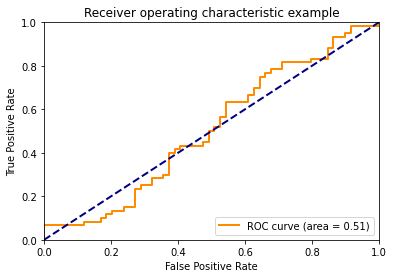

In [75]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

Improve Model with more Features?
- Total Strikes Landed
- Total Takedwons
- Total Submissions
- Average Fight Time

In [76]:
#Make new List of all the fighters looked at in this project
all_fighters = list(set(winner_lst + loser_lst))

In [77]:
df_impr

,Result,Fighter1,Fighter2,KD,Strikes,TD,Sub,Weight Class,Method,Round,Time
4900,Francisco Trinaldo,Francisco Trinaldo,CJ Keith,0-0,12-3,2-0,1-0,Lightweight,SUB,2,1.833333


In [78]:
#Difference in Average time per fight
time = 0
for i in range(len(df_impr)):    
    rounds = (df_impr.iloc[i]['Round'])
    print(rounds)
    time_fight = (df_impr.iloc[i]['Time'])* rounds
    print(time)
    time = time_fight + time
    print(time)

print(i)
avg_time = time / (i+1)
print(avg_time)

2
0
3.6666666666666665
0
3.6666666666666665


In [79]:
#Get the additional features for the winners list

ttl_strikes_lst = []
ttl_td_lst = []
ttl_sub_lst = []
avg_time_fighter = [] #Stores the average time of a fight of a fighter

for fighter in all_fighters:
    print(fighter)
    df_impr = (df_events[(df_events['Fighter1'] == fighter) | (df_events['Fighter2'] == fighter)])
   
    ttl_strikes = 0 #Initialise ttl strikes by each fighter each time
    ttl_tds = 0
    ttl_subs = 0
    time = 0

    #Loop through new dataframe and get the data
    for i in range(len(df_impr)):
    
    #Check if Fighter is Fighter1 or Fighter2
        
        if fighter == df_impr.iloc[i]['Fighter1']:
            
            #Strikes
            strikes = df_impr.iloc[i]['Strikes']
            strikes = strikes.split('-')
            strikes = strikes[0]

            #Takedowns
            tds = df_impr.iloc[i]['TD']
            tds = tds.split('-')
            tds = tds[0]      

            #Submissions
            subs = df_impr.iloc[i]['Sub']
            subs = subs.split('-')
            subs = subs[0]

            #Average Time per fight
            rounds = (df_impr.iloc[i]['Round']) #Get how many rounds was in that fight
            print("roudns", rounds)
            time_fight = (df_impr.iloc[i]['Time'])* rounds
            print(time_fight, "Total timne of that fight")
            time = time_fight + time
            print(time, "Total time")      

        else: #Fighter is Fighter2
            
            #Strikes
            strikes = df_impr.iloc[i]['Strikes']
            strikes = strikes.split('-')
            strikes = strikes[1]

            #Takedowns
            tds = df_impr.iloc[i]['TD']
            tds = tds.split('-')
            tds = tds[1]
            
            #Submissions
            subs = df_impr.iloc[i]['Sub']
            subs = subs.split('-')
            subs = subs[1]   

            #Average Time per fight
            rounds = (df_impr.iloc[i]['Round']) #Get how many rounds was in that fight
            print("roudns", rounds)
            time_fight = (df_impr.iloc[i]['Time'])* rounds
            print(time_fight, "Total timne of that fight")
            time = time_fight + time
            print(time, "Total time")
        
        ttl_strikes = ttl_strikes + int(strikes)
        ttl_tds = ttl_tds + int(tds)
        ttl_subs = ttl_subs + int(subs)
    

    ttl_strikes_lst.append(ttl_strikes)
    ttl_td_lst.append(ttl_tds)
    ttl_sub_lst.append(ttl_subs)
    avg_time_fighter.append(time / (i+1))   #Append the average time


Ross Pearson
roudns 1
2.8666666666666667 Total timne of that fight
2.8666666666666667 Total time
roudns 3
15.0 Total timne of that fight
17.866666666666667 Total time
roudns 3
15.0 Total timne of that fight
32.86666666666667 Total time
roudns 2
6.066666666666666 Total timne of that fight
38.93333333333334 Total time
roudns 3
15.0 Total timne of that fight
53.93333333333334 Total time
roudns 3
15.0 Total timne of that fight
68.93333333333334 Total time
roudns 3
15.0 Total timne of that fight
83.93333333333334 Total time
roudns 3
15.0 Total timne of that fight
98.93333333333334 Total time
roudns 3
15.0 Total timne of that fight
113.93333333333334 Total time
roudns 3
15.0 Total timne of that fight
128.93333333333334 Total time
roudns 2
3.1 Total timne of that fight
132.03333333333333 Total time
roudns 2
3.3 Total timne of that fight
135.33333333333334 Total time
roudns 2
3.1666666666666665 Total timne of that fight
138.5 Total time
roudns 3
15.0 Total timne of that fight
153.5 Total time


In [80]:
df_add_pred = pd.DataFrame({'fighter':all_fighters,'ttl_strikes':ttl_strikes_lst,'ttl_takedowns':ttl_td_lst,'ttl_submissions':ttl_sub_lst,'avg_fight_time':avg_time_fighter})
df_add_pred #.sort_values(by='ttl_strikes')

,fighter,ttl_strikes,ttl_takedowns,ttl_submissions,avg_fight_time
0,Ross Pearson,587,5,0,10.733333
1,Ernest Chavez,82,2,0,14.025000
2,Ottman Azaitar,53,0,0,2.533333
3,Dan Moret,96,3,1,10.655556
4,Abel Trujillo,166,13,1,8.452083
...,...,...,...,...,...
280,Mac Danzig,75,0,0,10.283333
281,Danny Castillo,270,15,2,11.875000
282,Jessin Ayari,65,0,0,8.100000
283,Michael Johnson,897,7,1,10.563542


## Set up improved Model

- Want to check the differences between ttl_strikes, ttl_takedowns, and ttl_submissions of fighters and use that as new predictor variables

In [81]:
df_add_pred.dtypes

fighter             object
ttl_strikes          int64
ttl_takedowns        int64
ttl_submissions      int64
avg_fight_time     float64
dtype: object

In [82]:
(df_add_pred[df_add_pred['fighter'] == 'John Makdessi']) #['ttl_strikes']

,fighter,ttl_strikes,ttl_takedowns,ttl_submissions,avg_fight_time
140,John Makdessi,963,0,0,12.55


In [83]:
df_add_pred

,fighter,ttl_strikes,ttl_takedowns,ttl_submissions,avg_fight_time
0,Ross Pearson,587,5,0,10.733333
1,Ernest Chavez,82,2,0,14.025000
2,Ottman Azaitar,53,0,0,2.533333
3,Dan Moret,96,3,1,10.655556
4,Abel Trujillo,166,13,1,8.452083
...,...,...,...,...,...
280,Mac Danzig,75,0,0,10.283333
281,Danny Castillo,270,15,2,11.875000
282,Jessin Ayari,65,0,0,8.100000
283,Michael Johnson,897,7,1,10.563542


In [84]:
#Get number of knockouts of each fighter in the last 10 years
len(df_events[(df_events['Fighter1'] == 'Justin Gaethje') & (df_events['Method'] == 'KO')])

5

In [85]:
df_events

,Result,Fighter1,Fighter2,KD,Strikes,TD,Sub,Weight Class,Method,Round,Time
11,Justin Gaethje,Justin Gaethje,Rafael Fiziev,0-0,103-97,1-0,0-0,Lightweight,M-DEC,3,5.000000
16,Chris Duncan,Chris Duncan,Omar Morales,0-0,53-47,5-0,0-0,Lightweight,S-DEC,3,5.000000
17,Yanal Ashmouz,Yanal Ashmouz,Sam Patterson,0-0,15-2,1-0,0-0,Lightweight,KO,1,1.250000
41,Mateusz Gamrot,Mateusz Gamrot,Jalin Turner,0-1,29-40,4-0,0-0,Lightweight,S-DEC,3,5.000000
51,Loik Radzhabov,Loik Radzhabov,Esteban Ribovics,0-1,40-66,11-0,0-1,Lightweight,U-DEC,3,5.000000
...,...,...,...,...,...,...,...,...,...,...,...
4881,Anthony Pettis,Anthony Pettis,Donald Cerrone,1-0,18-4,0-0,0-0,Lightweight,KO,1,2.583333
4883,TJ Grant,TJ Grant,Matt Wiman,1-0,54-18,0-0,0-0,Lightweight,KO,1,4.850000
4893,Khabib Nurmagomedov,Khabib Nurmagomedov,Thiago Tavares,1-0,22-2,0-0,0-0,Lightweight,KO,1,1.916667
4897,Edson Barboza,Edson Barboza,Lucas Martins,1-0,26-12,0-0,0-0,Lightweight,KO,1,2.633333


In [86]:
df_add_pred[df_add_pred['fighter'] == 'Justin Gaethje']

,fighter,ttl_strikes,ttl_takedowns,ttl_submissions,avg_fight_time
209,Justin Gaethje,820,1,0,7.886364


In [87]:
df_add_pred[df_add_pred['fighter'] == 'Rafael Fiziev']

,fighter,ttl_strikes,ttl_takedowns,ttl_submissions,avg_fight_time
36,Rafael Fiziev,497,2,0,9.252083


In [88]:
-1*(((df_add_pred[df_add_pred['fighter'] == 'Justin Gaethje'])['avg_fight_time'].values) - ((df_add_pred[df_add_pred['fighter'] == 'Rafael Fiziev'])['avg_fight_time'].values))

array([1.3657197])

In [89]:
winner_height_diff = []
winner_weight_diff = []
winner_reach_diff = []
winner_wins_diff = []
experience_diff_lst = []
winner_strikes_diff = []
winner_td_diff = []
winner_sub_diff = []
winner_fighttime_diff = []

winner_lst = []
loser_lst = []
method_lst = []

for row in range(len(df_events)):
    fight = df_events.iloc[row]
    
    #Initalise Fighters names
    name_1 = fight['Result'] #Winner
    
    print(name_1)
    name_2 = fight['Fighter2'] #Loser
    
    print(name_2)
    
    try:
      
        #Calculate Height Difference
        height_diff = float((df_fighters[df_fighters['Name'] == name_1])['Height']) - float((df_fighters[df_fighters['Name'] == name_2])['Height'])
        print(((df_fighters[df_fighters['Name'] == name_1])['Height']))
        print(((df_fighters[df_fighters['Name'] == name_2])['Height']))
        print("Height Difference: ", height_diff)
        winner_height_diff.append(height_diff)

        #Caluclate Weight Difference
        weight_diff = float((df_fighters[df_fighters['Name'] == name_1])['Weight']) - float((df_fighters[df_fighters['Name'] == name_2])['Weight'])
        print(((df_fighters[df_fighters['Name'] == name_1])['Weight']))
        print(((df_fighters[df_fighters['Name'] == name_2])['Weight']))
        print("Weight Difference: ", weight_diff)
        winner_weight_diff.append(weight_diff)

        #Caluclate Reach Difference
        reach_diff = float((df_fighters[df_fighters['Name'] == name_1])['Reach']) - float((df_fighters[df_fighters['Name'] == name_2])['Reach'])
        print(((df_fighters[df_fighters['Name'] == name_1])['Reach']))
        print(((df_fighters[df_fighters['Name'] == name_2])['Reach']))
        print("Reach Difference: ", reach_diff)
        winner_reach_diff.append(reach_diff)

        #Calculate Total Wins difference
        wins_diff = int((df_fighters[df_fighters['Name'] == name_1])['Wins']) - int((df_fighters[df_fighters['Name'] == name_2])['Wins'])
        print(((df_fighters[df_fighters['Name'] == name_1])['Wins']))
        print(((df_fighters[df_fighters['Name'] == name_2])['Wins']))
        print("Wins Difference: ", wins_diff)
        winner_wins_diff.append(wins_diff)

        #Total Games Difference (Experience)
        df_fight_1 = (df_fighters[df_fighters['Name'] == name_1])
        df_fight_2 = (df_fighters[df_fighters['Name'] == name_2])
        expereince_diff = int((df_fight_1['Wins']) + (df_fight_1['Losses']) + (df_fight_1['Draws'])) - int((df_fight_2['Wins']) + (df_fight_2['Losses']) + (df_fight_2['Draws']))

        print(int((df_fight_1['Wins']) + (df_fight_1['Losses']) + (df_fight_1['Draws'])))
        print(int((df_fight_2['Wins']) + (df_fight_2['Losses']) + (df_fight_2['Draws'])))
        print("Experience Difference: ", expereince_diff)
        experience_diff_lst.append(expereince_diff)

        #Total Strikes Difference
        strk_diff = ((df_add_pred[df_add_pred['fighter'] == name_1]))['ttl_strikes'].values - ((df_add_pred[df_add_pred['fighter'] == name_2])['ttl_strikes'].values)
        print(strk_diff)
        winner_strikes_diff.append(strk_diff[0])

        #Total TD Difference
        td_diff = ((df_add_pred[df_add_pred['fighter'] == name_1])['ttl_takedowns'].values) - ((df_add_pred[df_add_pred['fighter'] == name_2])['ttl_takedowns'].values)
        winner_td_diff.append(td_diff[0])

        #Total Sub Difference
        sub_diff = ((df_add_pred[df_add_pred['fighter'] == name_1])['ttl_submissions'].values) - ((df_add_pred[df_add_pred['fighter'] == name_2])['ttl_submissions'].values)
        winner_sub_diff.append(sub_diff[0])

        #Avg fight time difference
        fighttime_diff = -1*(((df_add_pred[df_add_pred['fighter'] == name_1])['avg_fight_time'].values) - ((df_add_pred[df_add_pred['fighter'] == name_2])['avg_fight_time'].values))
        winner_fighttime_diff.append(fighttime_diff[0])

        #Method of win
        method_lst.append(fight['Method'])




        winner_lst.append(name_1)
        loser_lst.append(name_2)
    
    except TypeError:
        print('Fighter doesnt have data.... Skipping...')
        continue

Justin Gaethje
Rafael Fiziev
1159    180.34
Name: Height, dtype: float64
1087    172.72
Name: Height, dtype: float64
Height Difference:  7.6200000000000045
1159    155.0
Name: Weight, dtype: float64
1087    155.0
Name: Weight, dtype: float64
Weight Difference:  0.0
1159    177.8
Name: Reach, dtype: float64
1087    180.34
Name: Reach, dtype: float64
Reach Difference:  -2.539999999999992
1159    24
Name: Wins, dtype: int64
1087    12
Name: Wins, dtype: int64
Wins Difference:  12
28
14
Experience Difference:  14
[323]
Chris Duncan
Omar Morales
923    177.8
Name: Height, dtype: float64
2405    180.34
Name: Height, dtype: float64
Height Difference:  -2.539999999999992
923    155.0
Name: Weight, dtype: float64
2405    155.0
Name: Weight, dtype: float64
Weight Difference:  0.0
923    180.34
Name: Reach, dtype: float64
2405    185.42
Name: Reach, dtype: float64
Reach Difference:  -5.0800000000000125
923    10
Name: Wins, dtype: int64
2405    11
Name: Wins, dtype: int64
Wins Difference:  -1
11


In [90]:
#Create Dataframe with the Feature Engieered variables and the fighter names
df_clean_2 = pd.DataFrame({'Winner':winner_lst,'Loser':loser_lst,'Method':method_lst,'strike_diff':winner_strikes_diff,'td_diff':winner_td_diff,'sub_diff':winner_sub_diff,'Height_Diff': winner_height_diff,'Reach_Diff': winner_reach_diff,'Wins_Diff': winner_wins_diff,'Exp_Diff': experience_diff_lst,'avg_fighttime_diff':winner_fighttime_diff})
df_clean_2.head()

,Winner,Loser,Method,strike_diff,td_diff,sub_diff,Height_Diff,Reach_Diff,Wins_Diff,Exp_Diff,avg_fighttime_diff
0,Justin Gaethje,Rafael Fiziev,M-DEC,323,-1,0,7.62,-2.54,12,14,1.365720
1,Chris Duncan,Omar Morales,S-DEC,-122,4,0,-2.54,-5.08,-1,-4,-2.208333
2,Yanal Ashmouz,Sam Patterson,KO,13,1,0,-15.24,-25.40,-3,-6,-0.000000
3,Mateusz Gamrot,Jalin Turner,S-DEC,41,24,-5,-12.70,-17.78,9,5,-5.352381
4,Loik Radzhabov,Esteban Ribovics,U-DEC,-26,11,-1,2.54,0.00,6,10,-0.000000


In [91]:
df_clean_2[((df_clean_2['Winner'] == 'Justin Gaethje') | (df_clean_2['Loser'] == 'Justin Gaethje')) & (df_clean_2['Method'] == 'KO')]

,Winner,Loser,Method,strike_diff,td_diff,sub_diff,Height_Diff,Reach_Diff,Wins_Diff,Exp_Diff,avg_fighttime_diff
178,Justin Gaethje,Tony Ferguson,KO,-148,-2,-15,0.00,-15.24,-2,-6,2.342803
205,Justin Gaethje,Donald Cerrone,KO,42,-10,-5,-5.08,-7.62,-12,-25,1.955303
243,Justin Gaethje,Edson Barboza,KO,40,-3,-1,0.00,-12.70,2,-5,1.899911
283,Justin Gaethje,James Vick,KO,357,-1,-5,-10.16,-15.24,11,10,0.127739
303,Dustin Poirier,Justin Gaethje,KO,246,16,10,-5.08,5.08,5,8,-0.431345
322,Eddie Alvarez,Justin Gaethje,KO,-464,10,1,-5.08,-2.54,5,7,-2.837446
344,Justin Gaethje,Michael Johnson,KO,-77,-6,-1,2.54,-7.62,2,-12,2.677178


In [92]:
df_clean_2['Method'] = df_clean_2['Method'].apply(lambda x: 1 if x in ['KO', 'SUB'] else 0).values

In [93]:
df_clean_2['Method'].value_counts()

1    303
0    291
Name: Method, dtype: int64

In [94]:
#Total KO/Submission difference in all games
winner_kosub_diff = []

for row in range(len(df_clean_2)):
    
    name_1 = df_clean_2.iloc[row]['Winner']
    name_2 = df_clean_2.iloc[row]['Loser']
    kosub_1 = df_clean_2[((df_clean_2['Winner'] == name_1) | (df_clean_2['Loser'] == name_1)) & (df_clean_2['Method'] == 1)]
    kosub_2 = df_clean_2[((df_clean_2['Winner'] == name_2) | (df_clean_2['Loser'] == name_2)) & (df_clean_2['Method'] == 1)]
    kosub_diff = len(kosub_1) - len(kosub_2)
    winner_kosub_diff.append(kosub_diff)

In [95]:
#Append winner ko difference to table
df_clean_2['ko_diff'] = winner_kosub_diff
df_clean_2.head()

,Winner,Loser,Method,strike_diff,td_diff,sub_diff,Height_Diff,Reach_Diff,Wins_Diff,Exp_Diff,avg_fighttime_diff,ko_diff
0,Justin Gaethje,Rafael Fiziev,0,323,-1,0,7.62,-2.54,12,14,1.365720,5
1,Chris Duncan,Omar Morales,0,-122,4,0,-2.54,-5.08,-1,-4,-2.208333,-1
2,Yanal Ashmouz,Sam Patterson,1,13,1,0,-15.24,-25.40,-3,-6,-0.000000,0
3,Mateusz Gamrot,Jalin Turner,0,41,24,-5,-12.70,-17.78,9,5,-5.352381,-1
4,Loik Radzhabov,Esteban Ribovics,0,-26,11,-1,2.54,0.00,6,10,-0.000000,0


In [96]:
#Correlation Matrix
df_clean_2.corr()

,Method,strike_diff,td_diff,sub_diff,Height_Diff,Reach_Diff,Wins_Diff,Exp_Diff,avg_fighttime_diff,ko_diff
Method,1.000000,-0.007704,-0.027328,0.153585,0.025767,0.045531,0.036651,0.029306,-0.128979,0.058258
strike_diff,-0.007704,1.000000,0.146349,0.247253,0.019784,-0.001488,0.272400,0.314685,-0.209437,0.491665
td_diff,-0.027328,0.146349,1.000000,0.211194,-0.134226,-0.116765,0.215043,0.098137,-0.222456,0.075279
sub_diff,0.153585,0.247253,0.211194,1.000000,0.133995,0.161999,0.286785,0.226942,0.093469,0.552046
Height_Diff,0.025767,0.019784,-0.134226,0.133995,1.000000,0.591175,-0.109066,-0.086100,0.082245,0.063132
Reach_Diff,0.045531,-0.001488,-0.116765,0.161999,0.591175,1.000000,-0.082393,-0.060864,0.152225,0.189171
Wins_Diff,0.036651,0.272400,0.215043,0.286785,-0.109066,-0.082393,1.000000,0.945598,0.004307,0.398980
Exp_Diff,0.029306,0.314685,0.098137,0.226942,-0.086100,-0.060864,0.945598,1.000000,0.019612,0.413411
avg_fighttime_diff,-0.128979,-0.209437,-0.222456,0.093469,0.082245,0.152225,0.004307,0.019612,1.000000,0.356517
ko_diff,0.058258,0.491665,0.075279,0.552046,0.063132,0.189171,0.398980,0.413411,0.356517,1.000000


- KO Difference doesnt have a correlation with the outcome method of the fight
- Submissions difference is the highest correlated with whether a fight ends with KO/Sub or by Decision
    - Suggesting that, if a fighter has had more Sub/KO than its competitor, it is likely the the fight will end the same way
- After adding the Average Fight Time difference between competitors it also has a higher correlation with the outcome method
    - Suggests that, if a fighter has had less time in fights on average (in the last 10 years) than its competitor it is more likely they will win by a method of KO/Sub vs Decision

In [97]:
df_clean_2.iloc[:,3:]

,strike_diff,td_diff,sub_diff,Height_Diff,Reach_Diff,Wins_Diff,Exp_Diff,avg_fighttime_diff,ko_diff
0,323,-1,0,7.62,-2.54,12,14,1.365720,5
1,-122,4,0,-2.54,-5.08,-1,-4,-2.208333,-1
2,13,1,0,-15.24,-25.40,-3,-6,-0.000000,0
3,41,24,-5,-12.70,-17.78,9,5,-5.352381,-1
4,-26,11,-1,2.54,0.00,6,10,-0.000000,0
...,...,...,...,...,...,...,...,...,...
589,146,-1,0,-2.54,-7.62,-26,-41,-5.145833,-2
590,-373,-9,3,-7.62,-2.54,-12,-19,0.505303,-5
591,-40,-1,0,0.00,10.16,5,0,4.300000,-1
592,561,55,7,7.62,0.00,8,0,-9.335000,3


In [98]:
#Input Variables
X_2 = df_clean_2.iloc[:,3:] #strike_diff	td_diff	sub_diff	Height_Diff	Reach_Diff	Wins_Diff	Exp_Diff	avg_fighttime_diff	ko_diff
#Predictor Variable
y_2 = df_clean_2['Method']

In [99]:
y_2.value_counts()

1    303
0    291
Name: Method, dtype: int64

Partition

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.2,random_state=1)

## Logistic Regression

Build Model

In [101]:
clf = LogisticRegression(random_state=1,max_iter = 2000)

Fit Model

In [102]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=1)

In [103]:
clf.coef_

array([[-0.00103869, -0.010072  ,  0.067884  , -0.01495275,  0.01450751,
        -0.00782191,  0.00519362, -0.12239031,  0.07786057]])

In [104]:
clf.intercept_

array([-0.00225095])

In [105]:
for col in zip(X_train.columns, clf.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

strike_diff  -0.001039
td_diff     -0.010072
sub_diff    +0.067884
Height_Diff  -0.014953
Reach_Diff  +0.014508
Wins_Diff   -0.007822
Exp_Diff    +0.005194
avg_fighttime_diff  -0.122390
ko_diff     +0.077861


How well did the Model fit the training & test data?

In [106]:
sum(y_test) / len(y_test)

0.5042016806722689

In [107]:
clf.score(X_train, y_train)

0.5810526315789474

In [108]:
clf.score(X_test, y_test)

0.6890756302521008

Confusion Matrix to see where the Model went wrong

In [109]:
from sklearn.metrics import confusion_matrix
y_pred_class = clf.predict(X_test)
# print(metrics.confusion_matrix(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[[43 16]
 [21 39]]
[['TN' 'FP']
 ['FN' 'TP']]


- True Positive: Correctly predicted a KO/Sub of a fight
- True Negative: Correctly predicted another method of a fight
- False Positive: Falsely predicted a KO/Sub
- False Negative: Falsely predicted another method 

In [110]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        59
           1       0.71      0.65      0.68        60

    accuracy                           0.69       119
   macro avg       0.69      0.69      0.69       119
weighted avg       0.69      0.69      0.69       119



#### ROC Curve

In [111]:
from sklearn import metrics

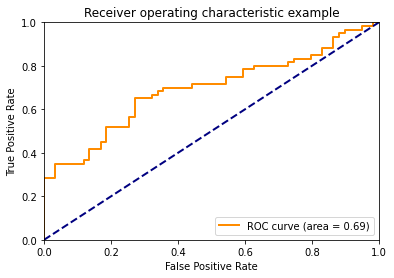

In [112]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

Adding the additional features helped increase the probability of the model predicting correctly, indicated by the area under the ROC curve

## SVM

In [113]:
from sklearn import svm


In [114]:
#Build Model
clf_svc = svm.SVC(C = 1000,probability=True)

In [115]:
clf_svc.fit(X_train,y_train)

SVC(C=1000, probability=True)

In [116]:
y_pred_class = clf_svc.predict(X_test)

print(y_pred_class)

# predicted test probability:
metrics.accuracy_score(y_pred_class,y_test)

[0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0
 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0
 1 1 1 0 1 1 0 1]


0.5378151260504201

In [117]:
print(classification_report(y_test, clf_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.54      0.51      0.52        59
           1       0.54      0.57      0.55        60

    accuracy                           0.54       119
   macro avg       0.54      0.54      0.54       119
weighted avg       0.54      0.54      0.54       119



## Naive Bayes

In [118]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()

In [119]:
clf_nb.fit(X_train, y_train)

GaussianNB()

In [120]:
metrics.accuracy_score(clf_nb.predict(X_test),y_test)

0.680672268907563

In [121]:
confusion_matrix(y_test, clf_nb.predict(X_test))

array([[48, 11],
       [27, 33]], dtype=int64)

In [122]:
print(classification_report(y_test, clf_nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.81      0.72        59
           1       0.75      0.55      0.63        60

    accuracy                           0.68       119
   macro avg       0.70      0.68      0.68       119
weighted avg       0.70      0.68      0.68       119



In [123]:
#precision - Proportion of Positive Identifications that were **correct** (# of TP / sum(TP+FP) - )
#Recall - Proportion of ACTUAL Positives that were correctly Identified (# of TP / sum(TP+FN))
#F1 SCore - It provides a balance between precision and recall - The harmonic mean of perciosion and recall
#Support - The number of samples in each class

## GridSearchCV Hyperparameter Tuning

In [124]:
from sklearn.model_selection import GridSearchCV

#### Logistic Regression

In [125]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

In [126]:
lr = LogisticRegression(solver = 'liblinear', max_iter = 2000, random_state = 1) #Is liblinear the best one to use here?
GS_lr = GridSearchCV(lr,lr_params)
GS_lr.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=2000, random_state=1,
                                          solver='liblinear'),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']})

In [127]:
GS_lr.best_score_

0.5263157894736843

In [128]:
GS_lr.best_params_

{'C': 1, 'penalty': 'l2'}

In [129]:
lr_best = LogisticRegression(solver = 'liblinear', max_iter = 2000, random_state = 1, C = 1, penalty = 'l2')

In [130]:
lr_best.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=2000, random_state=1, solver='liblinear')

In [131]:
lr_best.score(X_test, y_test)

0.6890756302521008

In [132]:
print(classification_report(y_test, lr_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        59
           1       0.71      0.65      0.68        60

    accuracy                           0.69       119
   macro avg       0.69      0.69      0.69       119
weighted avg       0.69      0.69      0.69       119



#### SVM

In [133]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['rbf'] #Cant use 'linear' - takes too long
}

In [134]:
svc = svm.SVC()

In [135]:
GS_svc = GridSearchCV(svc,svc_params, cv = 5, scoring = 'accuracy',n_jobs = -1)


In [136]:
GS_svc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [137]:
GS_svc.best_score_

0.6126315789473684

In [138]:
GS_svc.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [139]:
best_svc = svm.SVC(C = 100, gamma = 0.0001, kernel = 'rbf', probability= True)

In [140]:
best_svc.fit(X_train,y_train)

SVC(C=100, gamma=0.0001, probability=True)

In [141]:
best_svc.score(X_test, y_test)

0.6134453781512605

In [142]:
print(classification_report(y_test, best_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62        59
           1       0.62      0.58      0.60        60

    accuracy                           0.61       119
   macro avg       0.61      0.61      0.61       119
weighted avg       0.61      0.61      0.61       119



In [143]:
from sklearn.metrics import roc_curve, auc

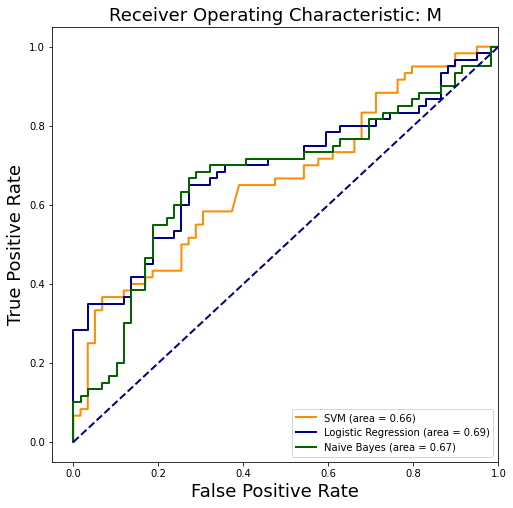

In [144]:
svc_probs = best_svc.predict_proba(X_test)[:, 1] # Calculate the predicted probabilities for the testing data
lr_probs = lr_best.predict_proba(X_test)[:, 1]
nb_probs = clf_nb.predict_proba(X_test)[:, 1]

# Find fpr, tpr
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)

# Find auc
roc_auc_svc = auc(fpr_svc, tpr_svc)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_nb = auc(fpr_nb, tpr_nb)

lw = 2
plt.figure(figsize=[8,8])
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=lw, label='SVM (area = %0.2f)' % roc_auc_svc)
plt.plot(fpr_lr, tpr_lr, color='darkblue', lw=lw, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_nb, tpr_nb, color='darkgreen', lw=lw, label='Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

- Naive Bayes:
    - Estimates the probability for a particular class being chosen given the value of the features
    - GuassianNB - Assumes normally distributed features - Continuous features

## Simpler Model

- As seen in the correlation matrix, the feature's that have a relatively significant amount of correlation is the Submissions and Avg Fight Time difference. So will just use that features as the input. The other features correlations look like it could be just due to noise

In [145]:
df_clean_2.corr()

,Method,strike_diff,td_diff,sub_diff,Height_Diff,Reach_Diff,Wins_Diff,Exp_Diff,avg_fighttime_diff,ko_diff
Method,1.000000,-0.007704,-0.027328,0.153585,0.025767,0.045531,0.036651,0.029306,-0.128979,0.058258
strike_diff,-0.007704,1.000000,0.146349,0.247253,0.019784,-0.001488,0.272400,0.314685,-0.209437,0.491665
td_diff,-0.027328,0.146349,1.000000,0.211194,-0.134226,-0.116765,0.215043,0.098137,-0.222456,0.075279
sub_diff,0.153585,0.247253,0.211194,1.000000,0.133995,0.161999,0.286785,0.226942,0.093469,0.552046
Height_Diff,0.025767,0.019784,-0.134226,0.133995,1.000000,0.591175,-0.109066,-0.086100,0.082245,0.063132
Reach_Diff,0.045531,-0.001488,-0.116765,0.161999,0.591175,1.000000,-0.082393,-0.060864,0.152225,0.189171
Wins_Diff,0.036651,0.272400,0.215043,0.286785,-0.109066,-0.082393,1.000000,0.945598,0.004307,0.398980
Exp_Diff,0.029306,0.314685,0.098137,0.226942,-0.086100,-0.060864,0.945598,1.000000,0.019612,0.413411
avg_fighttime_diff,-0.128979,-0.209437,-0.222456,0.093469,0.082245,0.152225,0.004307,0.019612,1.000000,0.356517
ko_diff,0.058258,0.491665,0.075279,0.552046,0.063132,0.189171,0.398980,0.413411,0.356517,1.000000


In [146]:
X_simple = df_clean_2[['sub_diff','avg_fighttime_diff']] #.values.reshape(-1, 1) #have to reshape into a 2D array since we are only using 1 feature
y_simple = df_clean_2['Method']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size = 0.2,random_state=1)

### Logistic Regression

In [148]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

In [149]:
lr = LogisticRegression(solver = 'liblinear', max_iter = 2000, random_state = 1) #Is liblinear the best one to use here?
GS_lr = GridSearchCV(lr,lr_params)
GS_lr.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=2000, random_state=1,
                                          solver='liblinear'),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']})

In [150]:
GS_lr.best_score_

0.5663157894736843

In [151]:
GS_lr.best_params_

{'C': 1, 'penalty': 'l1'}

In [152]:
lr_best = LogisticRegression(solver = 'liblinear', max_iter = 2000, random_state = 1, C = 1, penalty = 'l1')

In [153]:
lr_best.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=2000, penalty='l1', random_state=1,
                   solver='liblinear')

In [154]:
lr_best.score(X_test, y_test)

0.6302521008403361

In [155]:
print(classification_report(y_test, lr_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63        59
           1       0.63      0.63      0.63        60

    accuracy                           0.63       119
   macro avg       0.63      0.63      0.63       119
weighted avg       0.63      0.63      0.63       119



#### SVM

In [156]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['rbf','linear'] #Cant use 'linear' - takes too long
}

In [157]:
svc = svm.SVC()

In [158]:
GS_svc = GridSearchCV(svc,svc_params, cv = 5, scoring = 'accuracy',n_jobs = -1)


In [159]:
GS_svc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [160]:
GS_svc.best_score_

0.5789473684210527

In [161]:
GS_svc.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [162]:
best_svc = svm.SVC(C = 10, gamma = 0.001, kernel = 'rbf', probability= True)

In [163]:
best_svc.fit(X_train,y_train)

SVC(C=10, gamma=0.001, probability=True)

In [164]:
best_svc.score(X_test, y_test)

0.6134453781512605

In [165]:
print(classification_report(y_test, best_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.86      0.69        59
           1       0.73      0.37      0.49        60

    accuracy                           0.61       119
   macro avg       0.65      0.62      0.59       119
weighted avg       0.65      0.61      0.59       119



Only using the two features that had the highest correlation with what we were trying to predict improved the model

### Naive Bayes

In [166]:
clf_nb.fit(X_train, y_train)

GaussianNB()

In [167]:
metrics.accuracy_score(clf_nb.predict(X_test),y_test)

0.6218487394957983

In [168]:
confusion_matrix(y_test, clf_nb.predict(X_test))

array([[42, 17],
       [28, 32]], dtype=int64)

In [169]:
print(classification_report(y_test, clf_nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65        59
           1       0.65      0.53      0.59        60

    accuracy                           0.62       119
   macro avg       0.63      0.62      0.62       119
weighted avg       0.63      0.62      0.62       119



In [170]:
#precision - Proportion of Positive Identifications that were **correct** (# of TP / sum(TP+FP) - )
#Recall - Proportion of ACTUAL Positives that were correctly Identified (# of TP / sum(TP+FN))
#F1 SCore - It provides a balance between precision and recall - The harmonic mean of perciosion and recall
#Support - The number of samples in each class

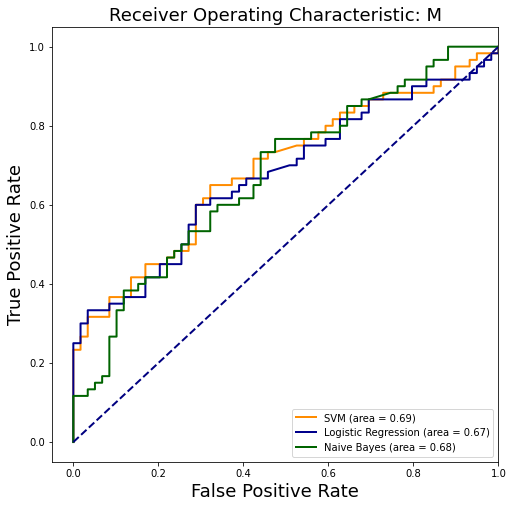

In [171]:
svc_probs = best_svc.predict_proba(X_test)[:, 1] # Calculate the predicted probabilities for the testing data
lr_probs = lr_best.predict_proba(X_test)[:, 1]
nb_probs = clf_nb.predict_proba(X_test)[:, 1]

# Find fpr, tpr
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)

# Find auc
roc_auc_svc = auc(fpr_svc, tpr_svc)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_nb = auc(fpr_nb, tpr_nb)

lw = 2
plt.figure(figsize=[8,8])
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=lw, label='SVM (area = %0.2f)' % roc_auc_svc)
plt.plot(fpr_lr, tpr_lr, color='darkblue', lw=lw, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_nb, tpr_nb, color='darkgreen', lw=lw, label='Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Standard Scaling

Only need to scale when looking at multiple features

In [172]:
#Input Variables
X_2 = df_clean_2.iloc[:,3:] 
#Predictor Variable
y_2 = df_clean_2['Method']

In [173]:
X_2

,strike_diff,td_diff,sub_diff,Height_Diff,Reach_Diff,Wins_Diff,Exp_Diff,avg_fighttime_diff,ko_diff
0,323,-1,0,7.62,-2.54,12,14,1.365720,5
1,-122,4,0,-2.54,-5.08,-1,-4,-2.208333,-1
2,13,1,0,-15.24,-25.40,-3,-6,-0.000000,0
3,41,24,-5,-12.70,-17.78,9,5,-5.352381,-1
4,-26,11,-1,2.54,0.00,6,10,-0.000000,0
...,...,...,...,...,...,...,...,...,...
589,146,-1,0,-2.54,-7.62,-26,-41,-5.145833,-2
590,-373,-9,3,-7.62,-2.54,-12,-19,0.505303,-5
591,-40,-1,0,0.00,10.16,5,0,4.300000,-1
592,561,55,7,7.62,0.00,8,0,-9.335000,3


In [174]:
y_2.value_counts()

1    303
0    291
Name: Method, dtype: int64

Partition

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.2,random_state=1)

In [176]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [177]:
scaler.fit(X_train)

StandardScaler()

In [178]:
X_train_scaled = scaler.transform(X_train)

In [179]:
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [180]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

In [181]:
lr = LogisticRegression(solver = 'liblinear', max_iter = 2000, random_state = 1) #Is liblinear the best one to use here?
GS_lr = GridSearchCV(lr,lr_params)
GS_lr.fit(X_train_scaled,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=2000, random_state=1,
                                          solver='liblinear'),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']})

In [182]:
GS_lr.best_score_

0.5263157894736843

In [183]:
GS_lr.best_params_

{'C': 10, 'penalty': 'l2'}

In [184]:
lr_best = LogisticRegression(solver = 'liblinear', max_iter = 2000, random_state = 1, C = 1, penalty = 'l2')

In [185]:
lr_best.fit(X_train_scaled,y_train)

LogisticRegression(C=1, max_iter=2000, random_state=1, solver='liblinear')

In [186]:
lr_best.score(X_test_scaled, y_test)

0.6890756302521008

In [187]:
print(classification_report(y_test, lr_best.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        59
           1       0.71      0.65      0.68        60

    accuracy                           0.69       119
   macro avg       0.69      0.69      0.69       119
weighted avg       0.69      0.69      0.69       119



#### SVM

In [188]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['rbf','linear'] #Cant use 'linear' - takes too long
}

In [189]:
svc = svm.SVC()

In [190]:
GS_svc = GridSearchCV(svc,svc_params, cv = 5, scoring = 'accuracy',n_jobs = -1)


In [191]:
GS_svc.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [192]:
GS_svc.best_score_

0.5242105263157895

In [193]:
GS_svc.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

In [194]:
best_svc = svm.SVC(C = 1, gamma = 0.001, kernel = 'linear', probability= True)

In [195]:
best_svc.fit(X_train_scaled,y_train)

SVC(C=1, gamma=0.001, kernel='linear', probability=True)

In [196]:
best_svc.score(X_test_scaled, y_test)

0.6638655462184874

In [197]:
print(classification_report(y_test, best_svc.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69        59
           1       0.71      0.57      0.63        60

    accuracy                           0.66       119
   macro avg       0.67      0.66      0.66       119
weighted avg       0.67      0.66      0.66       119



Only using the 2 features that had the highest correlation with what we were trying to predict improved the model

### Naive Bayes

In [198]:
clf_nb.fit(X_train_scaled, y_train)

GaussianNB()

In [199]:
metrics.accuracy_score(clf_nb.predict(X_test_scaled),y_test)

0.680672268907563

In [200]:
confusion_matrix(y_test, clf_nb.predict(X_test_scaled))

array([[48, 11],
       [27, 33]], dtype=int64)

In [201]:
print(classification_report(y_test, clf_nb.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.64      0.81      0.72        59
           1       0.75      0.55      0.63        60

    accuracy                           0.68       119
   macro avg       0.70      0.68      0.68       119
weighted avg       0.70      0.68      0.68       119



In [202]:
#precision - Proportion of Positive Identifications that were **correct** (# of TP / sum(TP+FP) - )
#Recall - Proportion of ACTUAL Positives that were correctly Identified (# of TP / sum(TP+FN))
#F1 SCore - It provides a balance between precision and recall - The harmonic mean of perciosion and recall
#Support - The number of samples in each class

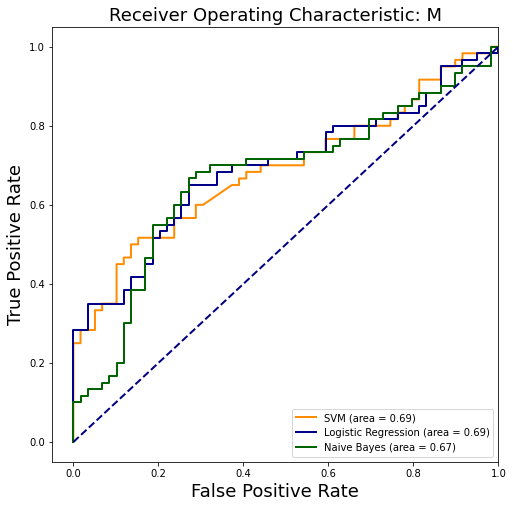

In [203]:
svc_probs = best_svc.predict_proba(X_test_scaled)[:, 1] # Calculate the predicted probabilities for the testing data
lr_probs = lr_best.predict_proba(X_test_scaled)[:, 1]
nb_probs = clf_nb.predict_proba(X_test_scaled)[:, 1]

# Find fpr, tpr
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)

# Find auc
roc_auc_svc = auc(fpr_svc, tpr_svc)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_nb = auc(fpr_nb, tpr_nb)

lw = 2
plt.figure(figsize=[8,8])
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=lw, label='SVM (area = %0.2f)' % roc_auc_svc)
plt.plot(fpr_lr, tpr_lr, color='darkblue', lw=lw, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_nb, tpr_nb, color='darkgreen', lw=lw, label='Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

- Scaling the data improved the accuracy of SVM and LR models


## Conclusion

- The best Model for predicting the likelihood of a fight being a KO/Sub or by Decision is:
    - **SVM**
    - Features - strike_diff | td_diff | sub_diff | Height_Diff | Reach_Diff | Wins_Diff | Exp_Diff | avg_fighttime_diff | ko_diff
        - Highest Correlated Features: Submissions Difference (Sub Diff) and Average Fight Time difference.
    - Normalising the features increased prediction accuracy
    - Accuracy Comparisons of Models:
        - SVM: Accuracy Score - 69.7% ; AUC - 71% ; F1 - 67%
        - LR: Accuracy Score - 67.2% ; AUC - 69% ; F1 - 67%
        - NB: Accuracy Score - 63.9% ; AUC - 67% ; F1 - 61%


#### Final Model

In [236]:
events_new = pd.read_csv(r"ufc_event_data_new.csv")
df_events_new = pd.DataFrame(events_new)

In [237]:
#Only want to look at fights from the latest fight weekend
df_events_new

,Event Name,Event Date,Result,Fighter1,Fighter2,KD,Strikes,TD,Sub,Weight Class,Method,Round,Time
0,UFC 287: Pereira vs. Adesanya 2,"April 08, 2023",Israel Adesanya,Israel Adesanya,Alex Pereira,1-0,41-49,0-0,0-0,Middleweight,KO/TKO-Punch,2,4:21
1,UFC 287: Pereira vs. Adesanya 2,"April 08, 2023",Gilbert Burns,Gilbert Burns,Jorge Masvidal,0-0,42-39,4-0,0-0,Welterweight,U-DEC,3,5:00
2,UFC 287: Pereira vs. Adesanya 2,"April 08, 2023",Rob Font,Rob Font,Adrian Yanez,1-0,33-25,0-0,0-0,Bantamweight,KO/TKO-Punch,1,2:57
3,UFC 287: Pereira vs. Adesanya 2,"April 08, 2023",Kevin Holland,Kevin Holland,Santiago Ponzinibbio,1-0,66-44,0-0,0-0,Welterweight,KO/TKO-Punch,3,3:16
4,UFC 287: Pereira vs. Adesanya 2,"April 08, 2023",Christian Rodriguez,Christian Rodriguez,Raul Rosas Jr.,0-0,29-2,1-3,0-1,Bantamweight,U-DEC,3,5:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,UFC 2: No Way Out,"March 11, 1994",Orlando Wiet,Orlando Wiet,Robert Lucarelli,0-0,8-2,0-1,0-1,Open Weight,KO/TKO,1,2:50
7068,UFC 2: No Way Out,"March 11, 1994",Frank Hamaker,Frank Hamaker,Thaddeus Luster,0-0,2-0,1-0,3-0,Open Weight,SUB-Keylock,1,4:52
7069,UFC 2: No Way Out,"March 11, 1994",Johnny Rhodes,Johnny Rhodes,David Levicki,0-0,11-4,1-0,0-0,Open Weight,KO/TKO-Punches,1,12:13
7070,UFC 2: No Way Out,"March 11, 1994",Patrick Smith,Patrick Smith,Ray Wizard,0-0,1-1,0-0,1-0,Open Weight,SUB-Guillotine-Choke,1,0:58


In [238]:
df_events_new['Event Date'] = pd.to_datetime(df_events_new['Event Date'])
df_events_new

,Event Name,Event Date,Result,Fighter1,Fighter2,KD,Strikes,TD,Sub,Weight Class,Method,Round,Time
0,UFC 287: Pereira vs. Adesanya 2,2023-04-08,Israel Adesanya,Israel Adesanya,Alex Pereira,1-0,41-49,0-0,0-0,Middleweight,KO/TKO-Punch,2,4:21
1,UFC 287: Pereira vs. Adesanya 2,2023-04-08,Gilbert Burns,Gilbert Burns,Jorge Masvidal,0-0,42-39,4-0,0-0,Welterweight,U-DEC,3,5:00
2,UFC 287: Pereira vs. Adesanya 2,2023-04-08,Rob Font,Rob Font,Adrian Yanez,1-0,33-25,0-0,0-0,Bantamweight,KO/TKO-Punch,1,2:57
3,UFC 287: Pereira vs. Adesanya 2,2023-04-08,Kevin Holland,Kevin Holland,Santiago Ponzinibbio,1-0,66-44,0-0,0-0,Welterweight,KO/TKO-Punch,3,3:16
4,UFC 287: Pereira vs. Adesanya 2,2023-04-08,Christian Rodriguez,Christian Rodriguez,Raul Rosas Jr.,0-0,29-2,1-3,0-1,Bantamweight,U-DEC,3,5:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,UFC 2: No Way Out,1994-03-11,Orlando Wiet,Orlando Wiet,Robert Lucarelli,0-0,8-2,0-1,0-1,Open Weight,KO/TKO,1,2:50
7068,UFC 2: No Way Out,1994-03-11,Frank Hamaker,Frank Hamaker,Thaddeus Luster,0-0,2-0,1-0,3-0,Open Weight,SUB-Keylock,1,4:52
7069,UFC 2: No Way Out,1994-03-11,Johnny Rhodes,Johnny Rhodes,David Levicki,0-0,11-4,1-0,0-0,Open Weight,KO/TKO-Punches,1,12:13
7070,UFC 2: No Way Out,1994-03-11,Patrick Smith,Patrick Smith,Ray Wizard,0-0,1-1,0-0,1-0,Open Weight,SUB-Guillotine-Choke,1,0:58


In [239]:
#Finding data from the year 2010 and below, to test out the model on data
#df_events_new = df_events_new[(df_events_new['Event Date'].dt.year < 2011)]
df_events_new['Time'] = pd.to_timedelta('00:' + df_events_new['Time']).dt.total_seconds().div(60).astype(float)
df_events_new

,Event Name,Event Date,Result,Fighter1,Fighter2,KD,Strikes,TD,Sub,Weight Class,Method,Round,Time
0,UFC 287: Pereira vs. Adesanya 2,2023-04-08,Israel Adesanya,Israel Adesanya,Alex Pereira,1-0,41-49,0-0,0-0,Middleweight,KO/TKO-Punch,2,4.350000
1,UFC 287: Pereira vs. Adesanya 2,2023-04-08,Gilbert Burns,Gilbert Burns,Jorge Masvidal,0-0,42-39,4-0,0-0,Welterweight,U-DEC,3,5.000000
2,UFC 287: Pereira vs. Adesanya 2,2023-04-08,Rob Font,Rob Font,Adrian Yanez,1-0,33-25,0-0,0-0,Bantamweight,KO/TKO-Punch,1,2.950000
3,UFC 287: Pereira vs. Adesanya 2,2023-04-08,Kevin Holland,Kevin Holland,Santiago Ponzinibbio,1-0,66-44,0-0,0-0,Welterweight,KO/TKO-Punch,3,3.266667
4,UFC 287: Pereira vs. Adesanya 2,2023-04-08,Christian Rodriguez,Christian Rodriguez,Raul Rosas Jr.,0-0,29-2,1-3,0-1,Bantamweight,U-DEC,3,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,UFC 2: No Way Out,1994-03-11,Orlando Wiet,Orlando Wiet,Robert Lucarelli,0-0,8-2,0-1,0-1,Open Weight,KO/TKO,1,2.833333
7068,UFC 2: No Way Out,1994-03-11,Frank Hamaker,Frank Hamaker,Thaddeus Luster,0-0,2-0,1-0,3-0,Open Weight,SUB-Keylock,1,4.866667
7069,UFC 2: No Way Out,1994-03-11,Johnny Rhodes,Johnny Rhodes,David Levicki,0-0,11-4,1-0,0-0,Open Weight,KO/TKO-Punches,1,12.216667
7070,UFC 2: No Way Out,1994-03-11,Patrick Smith,Patrick Smith,Ray Wizard,0-0,1-1,0-0,1-0,Open Weight,SUB-Guillotine-Choke,1,0.966667


In [240]:
#Only looking at Lightweight Weight Class
df_events_new = df_events_new[df_events_new['Weight Class'] == 'Lightweight']
df_events_new

,Event Name,Event Date,Result,Fighter1,Fighter2,KD,Strikes,TD,Sub,Weight Class,Method,Round,Time
23,UFC 286: Edwards vs. Usman 3,2023-03-18,Justin Gaethje,Justin Gaethje,Rafael Fiziev,0-0,103-97,1-0,0-0,Lightweight,M-DEC,3,5.000000
28,UFC 286: Edwards vs. Usman 3,2023-03-18,Chris Duncan,Chris Duncan,Omar Morales,0-0,53-47,5-0,0-0,Lightweight,S-DEC,3,5.000000
29,UFC 286: Edwards vs. Usman 3,2023-03-18,Yanal Ashmouz,Yanal Ashmouz,Sam Patterson,0-0,15-2,1-0,0-0,Lightweight,KO/TKO-Punches,1,1.250000
35,UFC 286: Edwards vs. Usman 3,2023-03-18,Draw,Jai Herbert,Ludovit Klein,0-0,43-47,1-2,0-0,Lightweight,M-DEC,3,5.000000
53,UFC 285: Jones vs. Gane,2023-03-04,Mateusz Gamrot,Mateusz Gamrot,Jalin Turner,0-1,29-40,4-0,0-0,Lightweight,S-DEC,3,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6948,UFC 13: The Ultimate Force,1997-05-30,Tito Ortiz,Tito Ortiz,Wes Albritton,0-0,21-0,1-0,0-0,Lightweight,KO/TKO-Punches,1,0.516667
6951,UFC 12: Judgement Day,1997-02-07,Jerry Bohlander,Jerry Bohlander,Nick Sanzo,0-0,2-0,1-0,1-0,Lightweight,SUB-Neck-Crank,1,0.650000
6954,UFC 12: Judgement Day,1997-02-07,Yoshiki Takahashi,Yoshiki Takahashi,Wallid Ismail,0-0,20-1,1-1,0-0,Lightweight,U-DEC,2,3.000000
6955,UFC 12: Judgement Day,1997-02-07,Jerry Bohlander,Jerry Bohlander,Rainy Martinez,0-0,0-0,1-0,1-0,Lightweight,SUB-Rear-Naked-Choke,1,1.400000


In [241]:
#Remove Draws
df_events_new = df_events_new[df_events_new['Result'] != 'Draw']
df_events_new.head()

,Event Name,Event Date,Result,Fighter1,Fighter2,KD,Strikes,TD,Sub,Weight Class,Method,Round,Time
23,UFC 286: Edwards vs. Usman 3,2023-03-18,Justin Gaethje,Justin Gaethje,Rafael Fiziev,0-0,103-97,1-0,0-0,Lightweight,M-DEC,3,5.00
28,UFC 286: Edwards vs. Usman 3,2023-03-18,Chris Duncan,Chris Duncan,Omar Morales,0-0,53-47,5-0,0-0,Lightweight,S-DEC,3,5.00
29,UFC 286: Edwards vs. Usman 3,2023-03-18,Yanal Ashmouz,Yanal Ashmouz,Sam Patterson,0-0,15-2,1-0,0-0,Lightweight,KO/TKO-Punches,1,1.25
53,UFC 285: Jones vs. Gane,2023-03-04,Mateusz Gamrot,Mateusz Gamrot,Jalin Turner,0-1,29-40,4-0,0-0,Lightweight,S-DEC,3,5.00
63,UFC 285: Jones vs. Gane,2023-03-04,Loik Radzhabov,Loik Radzhabov,Esteban Ribovics,0-1,40-66,11-0,0-1,Lightweight,U-DEC,3,5.00


In [242]:
#Fight we want to predict in the lightweight category
new_fight = (df_events_new[df_events_new.index == 5557]) #df_events_new.iloc[0]
pred_fighters = new_fight[['Fighter1','Fighter2']]#np.array(new_fight[['Fighter1','Fighter2']])
pred_fighters

,Fighter1,Fighter2
5557,Mac Danzig,Joe Stevenson


In [243]:
#Test based on fighters names
pred_fighter_arr = np.array([['Clay Guida','Rafa Garcia']])
pred_fighters = pd.DataFrame({'Fighter1': pred_fighter_arr[:,0], 'Fighter2': pred_fighter_arr[:,1]})
print(pred_fighters)

     Fighter1     Fighter2
0  Clay Guida  Rafa Garcia


In [244]:
pred_fighters.iloc[0][0]

'Clay Guida'

In [245]:
#Check that fighters have sufficient data

for fighter in pred_fighters.iloc[0]:
    fighter_row = df_fighters[df_fighters['Name'] == fighter]

    if not fighter_row.empty:
        # the row exists and has values
        print(fighter, "Has data, can use")
    else:
        print(fighter, "Does not have data, add data or skip..")
        # the row does not exist or has no values


Clay Guida Has data, can use
Rafa Garcia Has data, can use


In [246]:
df_events_new

,Event Name,Event Date,Result,Fighter1,Fighter2,KD,Strikes,TD,Sub,Weight Class,Method,Round,Time
23,UFC 286: Edwards vs. Usman 3,2023-03-18,Justin Gaethje,Justin Gaethje,Rafael Fiziev,0-0,103-97,1-0,0-0,Lightweight,M-DEC,3,5.000000
28,UFC 286: Edwards vs. Usman 3,2023-03-18,Chris Duncan,Chris Duncan,Omar Morales,0-0,53-47,5-0,0-0,Lightweight,S-DEC,3,5.000000
29,UFC 286: Edwards vs. Usman 3,2023-03-18,Yanal Ashmouz,Yanal Ashmouz,Sam Patterson,0-0,15-2,1-0,0-0,Lightweight,KO/TKO-Punches,1,1.250000
53,UFC 285: Jones vs. Gane,2023-03-04,Mateusz Gamrot,Mateusz Gamrot,Jalin Turner,0-1,29-40,4-0,0-0,Lightweight,S-DEC,3,5.000000
63,UFC 285: Jones vs. Gane,2023-03-04,Loik Radzhabov,Loik Radzhabov,Esteban Ribovics,0-1,40-66,11-0,0-1,Lightweight,U-DEC,3,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6948,UFC 13: The Ultimate Force,1997-05-30,Tito Ortiz,Tito Ortiz,Wes Albritton,0-0,21-0,1-0,0-0,Lightweight,KO/TKO-Punches,1,0.516667
6951,UFC 12: Judgement Day,1997-02-07,Jerry Bohlander,Jerry Bohlander,Nick Sanzo,0-0,2-0,1-0,1-0,Lightweight,SUB-Neck-Crank,1,0.650000
6954,UFC 12: Judgement Day,1997-02-07,Yoshiki Takahashi,Yoshiki Takahashi,Wallid Ismail,0-0,20-1,1-1,0-0,Lightweight,U-DEC,2,3.000000
6955,UFC 12: Judgement Day,1997-02-07,Jerry Bohlander,Jerry Bohlander,Rainy Martinez,0-0,0-0,1-0,1-0,Lightweight,SUB-Rear-Naked-Choke,1,1.400000


In [247]:
#Ensures data taken doesnt include the match I want to predict
#df_events_new = df_events_new.iloc[2:,]
df_events_new = df_events_new.drop(5557)
df_events_new

,Event Name,Event Date,Result,Fighter1,Fighter2,KD,Strikes,TD,Sub,Weight Class,Method,Round,Time
23,UFC 286: Edwards vs. Usman 3,2023-03-18,Justin Gaethje,Justin Gaethje,Rafael Fiziev,0-0,103-97,1-0,0-0,Lightweight,M-DEC,3,5.000000
28,UFC 286: Edwards vs. Usman 3,2023-03-18,Chris Duncan,Chris Duncan,Omar Morales,0-0,53-47,5-0,0-0,Lightweight,S-DEC,3,5.000000
29,UFC 286: Edwards vs. Usman 3,2023-03-18,Yanal Ashmouz,Yanal Ashmouz,Sam Patterson,0-0,15-2,1-0,0-0,Lightweight,KO/TKO-Punches,1,1.250000
53,UFC 285: Jones vs. Gane,2023-03-04,Mateusz Gamrot,Mateusz Gamrot,Jalin Turner,0-1,29-40,4-0,0-0,Lightweight,S-DEC,3,5.000000
63,UFC 285: Jones vs. Gane,2023-03-04,Loik Radzhabov,Loik Radzhabov,Esteban Ribovics,0-1,40-66,11-0,0-1,Lightweight,U-DEC,3,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6948,UFC 13: The Ultimate Force,1997-05-30,Tito Ortiz,Tito Ortiz,Wes Albritton,0-0,21-0,1-0,0-0,Lightweight,KO/TKO-Punches,1,0.516667
6951,UFC 12: Judgement Day,1997-02-07,Jerry Bohlander,Jerry Bohlander,Nick Sanzo,0-0,2-0,1-0,1-0,Lightweight,SUB-Neck-Crank,1,0.650000
6954,UFC 12: Judgement Day,1997-02-07,Yoshiki Takahashi,Yoshiki Takahashi,Wallid Ismail,0-0,20-1,1-1,0-0,Lightweight,U-DEC,2,3.000000
6955,UFC 12: Judgement Day,1997-02-07,Jerry Bohlander,Jerry Bohlander,Rainy Martinez,0-0,0-0,1-0,1-0,Lightweight,SUB-Rear-Naked-Choke,1,1.400000


In [248]:
#Remove DQ, Overturned, CNC, Overturned-Guillotine-Choke
df_events_new = df_events_new[~df_events_new['Method'].str.contains('DQ')]
df_events_new = df_events_new[~df_events_new['Method'].str.contains('Overturned')]
df_events_new = df_events_new[~df_events_new['Method'].str.contains('CNC')]
df_events_new = df_events_new[~df_events_new['Method'].str.contains('Overturned-Guillotine-Choke')]
#Boolean Masking to replace any string with the letters KO in it with KO
mask = df_events_new['Method'].str.contains('KO')
df_events_new.loc[mask, 'Method'] = 'KO'
#Boolean Masking to replace any string with the letters SUB in it with SUB
mask = df_events_new['Method'].str.contains('SUB')
df_events_new.loc[mask, 'Method'] = 'SUB'

In [249]:
df_events_new['Method'].value_counts()

U-DEC    449
KO       346
SUB      281
S-DEC    124
M-DEC     12
Name: Method, dtype: int64

In [250]:
new_fight

,Event Name,Event Date,Result,Fighter1,Fighter2,KD,Strikes,TD,Sub,Weight Class,Method,Round,Time
5557,UFC 124: St-Pierre vs Koscheck 2,2010-12-11,Mac Danzig,Mac Danzig,Joe Stevenson,1-0,9-6,0-0,0-0,Lightweight,KO/TKO-Punch,1,1.9


In [251]:
#Get all the differences in attributes of the fighters

In [252]:
#Get the additional features for the winners list

ttl_strikes_lst = []
ttl_td_lst = []
ttl_sub_lst = []
avg_time_fighter = [] #Stores the average time of a fight of a fighter

for fighter in pred_fighters.iloc[0]:
    print(fighter)
    df_impr = (df_events_new[(df_events_new['Fighter1'] == fighter) | (df_events_new['Fighter2'] == fighter)])
   
    ttl_strikes = 0 #Initialise ttl strikes by each fighter each time
    ttl_tds = 0
    ttl_subs = 0
    time = 0

    #Loop through new dataframe and get the data
    for i in range(len(df_impr)):
    
    #Check if Fighter is Fighter1 or Fighter2
        
        if fighter == df_impr.iloc[i]['Fighter1']:
            
            #Strikes
            strikes = df_impr.iloc[i]['Strikes']
            strikes = strikes.split('-')
            strikes = strikes[0]

            #Takedowns
            tds = df_impr.iloc[i]['TD']
            tds = tds.split('-')
            tds = tds[0]      

            #Submissions
            subs = df_impr.iloc[i]['Sub']
            subs = subs.split('-')
            subs = subs[0]

            #Average Time per fight
            rounds = (df_impr.iloc[i]['Round']) #Get how many rounds was in that fight
            print("roudns", rounds)
            time_fight = (df_impr.iloc[i]['Time'])* rounds
            print(time_fight, "Total timne of that fight")
            time = time_fight + time
            print(time, "Total time")      

        else: #Fighter is Fighter2
            
            #Strikes
            strikes = df_impr.iloc[i]['Strikes']
            strikes = strikes.split('-')
            strikes = strikes[1]

            #Takedowns
            tds = df_impr.iloc[i]['TD']
            tds = tds.split('-')
            tds = tds[1]
            
            #Submissions
            subs = df_impr.iloc[i]['Sub']
            subs = subs.split('-')
            subs = subs[1]   

            #Average Time per fight
            rounds = (df_impr.iloc[i]['Round']) #Get how many rounds was in that fight
            print("roudns", rounds)
            time_fight = (df_impr.iloc[i]['Time'])* rounds
            print(time_fight, "Total timne of that fight")
            time = time_fight + time
            print(time, "Total time")
        
        ttl_strikes = ttl_strikes + int(strikes)
        ttl_tds = ttl_tds + int(tds)
        ttl_subs = ttl_subs + int(subs)
    

    ttl_strikes_lst.append(ttl_strikes)
    ttl_td_lst.append(ttl_tds)
    ttl_sub_lst.append(ttl_subs)
    avg_time_fighter.append(time / (i+1))   #Append the average time


Clay Guida
roudns 3
15.0 Total timne of that fight
15.0 Total time
roudns 1
3.0166666666666666 Total timne of that fight
18.016666666666666 Total time
roudns 2
2.7 Total timne of that fight
20.716666666666665 Total time
roudns 3
15.0 Total timne of that fight
35.71666666666667 Total time
roudns 3
15.0 Total timne of that fight
50.71666666666667 Total time
roudns 3
15.0 Total timne of that fight
65.71666666666667 Total time
roudns 1
0.9666666666666668 Total timne of that fight
66.68333333333334 Total time
roudns 3
15.0 Total timne of that fight
81.68333333333334 Total time
roudns 1
2.3 Total timne of that fight
83.98333333333333 Total time
roudns 1
1.1166666666666667 Total timne of that fight
85.1 Total time
roudns 3
15.0 Total timne of that fight
100.1 Total time
roudns 5
25.0 Total timne of that fight
125.1 Total time
roudns 3
15.0 Total timne of that fight
140.1 Total time
roudns 3
15.0 Total timne of that fight
155.1 Total time
roudns 2
8.9 Total timne of that fight
164.0 Total time

In [253]:
ttl_td_lst

[63, 24]

In [254]:
ttl_strikes_lst
ttl_td_lst
ttl_sub_lst
print(avg_time_fighter)

[10.656172839506175, 14.111111111111109]


In [255]:
pred_fighters.iloc[0]

Fighter1     Clay Guida
Fighter2    Rafa Garcia
Name: 0, dtype: object

In [256]:
df_add_pred_new = pd.DataFrame({'fighter':pred_fighters.iloc[0],'ttl_strikes':ttl_strikes_lst,'ttl_takedowns':ttl_td_lst,'ttl_submissions':ttl_sub_lst,'avg_fight_time':avg_time_fighter})
df_add_pred_new #.sort_values(by='ttl_strikes')

,fighter,ttl_strikes,ttl_takedowns,ttl_submissions,avg_fight_time
Fighter1,Clay Guida,835,63,15,10.656173
Fighter2,Rafa Garcia,277,24,2,14.111111


In [257]:
#pred_fighters[0]

In [258]:
fighter_height_diff = []
fighter_weight_diff = []
fighter_reach_diff = []
fighter_wins_diff = []
experience_diff_lst = []
fighter_strikes_diff = []
fighter_td_diff = []
fighter_sub_diff = []
fighter_fighttime_diff = []

winner_lst = []
loser_lst = []
method_lst = []

#for row in range(len(df_events_new)):
#fight = df_events_new.iloc[row]

#Initalise Fighters names
name_1 = pred_fighters.iloc[0]['Fighter1'] #

print(name_1)
name_2 = pred_fighters.iloc[0]['Fighter2'] #

print(name_2)

#try:

#Calculate Height Difference
height_diff = float((df_fighters[df_fighters['Name'] == name_1])['Height']) - float((df_fighters[df_fighters['Name'] == name_2])['Height'])
print(((df_fighters[df_fighters['Name'] == name_1])['Height']))
print(((df_fighters[df_fighters['Name'] == name_2])['Height']))
print("Height Difference: ", height_diff)
fighter_height_diff.append(height_diff)

#Caluclate Weight Difference
weight_diff = float((df_fighters[df_fighters['Name'] == name_1])['Weight']) - float((df_fighters[df_fighters['Name'] == name_2])['Weight'])
print(((df_fighters[df_fighters['Name'] == name_1])['Weight']))
print(((df_fighters[df_fighters['Name'] == name_2])['Weight']))
print("Weight Difference: ", weight_diff)
fighter_weight_diff.append(weight_diff)

#Caluclate Reach Difference
reach_diff = float((df_fighters[df_fighters['Name'] == name_1])['Reach']) - float((df_fighters[df_fighters['Name'] == name_2])['Reach'])
print(((df_fighters[df_fighters['Name'] == name_1])['Reach']))
print(((df_fighters[df_fighters['Name'] == name_2])['Reach']))
print("Reach Difference: ", reach_diff)
fighter_reach_diff.append(reach_diff)

#Calculate Total Wins difference
wins_diff = int((df_fighters[df_fighters['Name'] == name_1])['Wins']) - int((df_fighters[df_fighters['Name'] == name_2])['Wins'])
print(((df_fighters[df_fighters['Name'] == name_1])['Wins']))
print(((df_fighters[df_fighters['Name'] == name_2])['Wins']))
print("Wins Difference: ", wins_diff)
fighter_wins_diff.append(wins_diff)

#Total Games Difference (Experience)
df_fight_1 = (df_fighters[df_fighters['Name'] == name_1])
df_fight_2 = (df_fighters[df_fighters['Name'] == name_2])
expereince_diff = int((df_fight_1['Wins']) + (df_fight_1['Losses']) + (df_fight_1['Draws'])) - int((df_fight_2['Wins']) + (df_fight_2['Losses']) + (df_fight_2['Draws']))

print(int((df_fight_1['Wins']) + (df_fight_1['Losses']) + (df_fight_1['Draws'])))
print(int((df_fight_2['Wins']) + (df_fight_2['Losses']) + (df_fight_2['Draws'])))
print("Experience Difference: ", expereince_diff)
experience_diff_lst.append(expereince_diff)

#Total Strikes Difference
strk_diff = ((df_add_pred_new[df_add_pred_new['fighter'] == name_1]))['ttl_strikes'].values - ((df_add_pred_new[df_add_pred_new['fighter'] == name_2])['ttl_strikes'].values)
print(strk_diff)
fighter_strikes_diff.append(strk_diff[0])

#Total TD Difference
td_diff = ((df_add_pred_new[df_add_pred_new['fighter'] == name_1])['ttl_takedowns'].values) - ((df_add_pred_new[df_add_pred_new['fighter'] == name_2])['ttl_takedowns'].values)
fighter_td_diff.append(td_diff[0])

#Total Sub Difference
sub_diff = ((df_add_pred_new[df_add_pred_new['fighter'] == name_1])['ttl_submissions'].values) - ((df_add_pred_new[df_add_pred_new['fighter'] == name_2])['ttl_submissions'].values)
fighter_sub_diff.append(sub_diff[0])

#Avg fight time difference
fighttime_diff = -1*(((df_add_pred_new[df_add_pred_new['fighter'] == name_1])['avg_fight_time'].values) - ((df_add_pred_new[df_add_pred_new['fighter'] == name_2])['avg_fight_time'].values))
fighter_fighttime_diff.append(fighttime_diff[0])

#Method of win
#method_lst.append(fight['Method'])




# winner_lst.append(name_1)
# loser_lst.append(name_2)

#except TypeError:
# print('Fighter doesnt have data.... Skipping...')
# continue

Clay Guida
Rafa Garcia
1353    170.18
Name: Height, dtype: float64
1191    170.18
Name: Height, dtype: float64
Height Difference:  0.0
1353    155.0
Name: Weight, dtype: float64
1191    155.0
Name: Weight, dtype: float64
Weight Difference:  0.0
1353    177.8
Name: Reach, dtype: float64
1191    177.8
Name: Reach, dtype: float64
Reach Difference:  0.0
1353    38
Name: Wins, dtype: int64
1191    15
Name: Wins, dtype: int64
Wins Difference:  23
57
18
Experience Difference:  39
[558]


In [259]:
df_events_new['Method'] = df_events_new['Method'].apply(lambda x: 1 if x in ['KO', 'SUB'] else 0).values

In [260]:
df_events_new['Method'].value_counts()

1    627
0    585
Name: Method, dtype: int64

In [261]:
#Total KO/Submission difference in all previous games
kosub_diff_arr = []


# name_1 = pred_fighters[0]
# name_2 = pred_fighters[1]
name_1 = pred_fighters.iloc[0]['Fighter1'] #

print(name_1)
name_2 = pred_fighters.iloc[0]['Fighter2'] #

print(name_2)
kosub_1 = df_events_new[((df_events_new['Result'] == name_1) & (df_events_new['Method'] == 1))]
kosub_2 = df_events_new[((df_events_new['Result'] == name_2) & (df_events_new['Method'] == 1))]
kosub_diff = len(kosub_1) - len(kosub_2)
kosub_diff_arr.append(kosub_diff)

Clay Guida
Rafa Garcia


In [262]:
kosub_diff_arr

[6]

In [263]:
#Create Dataframe with the Feature Engieered variables and the fighter names
df_clean_pred = pd.DataFrame({'Fighter1':pred_fighters.iloc[0]['Fighter1'],'Fighter2':pred_fighters.iloc[0]['Fighter2'],'strike_diff':fighter_strikes_diff,'td_diff':fighter_td_diff,'sub_diff':fighter_sub_diff,'Height_Diff': fighter_height_diff,'Reach_Diff': fighter_reach_diff,'Wins_Diff': fighter_wins_diff,'Exp_Diff': experience_diff_lst,'avg_fighttime_diff':fighter_fighttime_diff,'ko_diff':kosub_diff_arr})
df_clean_pred.head()

,Fighter1,Fighter2,strike_diff,td_diff,sub_diff,Height_Diff,Reach_Diff,Wins_Diff,Exp_Diff,avg_fighttime_diff,ko_diff
0,Clay Guida,Rafa Garcia,558,39,13,0.0,0.0,23,39,3.454938,6


In [264]:
X_new = df_clean_pred.iloc[:,2:]
X_new

,strike_diff,td_diff,sub_diff,Height_Diff,Reach_Diff,Wins_Diff,Exp_Diff,avg_fighttime_diff,ko_diff
0,558,39,13,0.0,0.0,23,39,3.454938,6


In [265]:
X_new_scaled = scaler.transform(X_new)

In [266]:
#Make predictions
y_pred = best_svc.predict(X_new)

c:\Users\I am Navin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [267]:
print(y_pred)

[0]


- Limitations:
    - The model doesnt specify who will win, so further improvement will  need to be made to get this